In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

import os, time,json
import tmdbsimple as tmdb

import glob

import json
with open('C:\\Users\\X474241\\OneDrive - Old Mutual\\Documents\\GitHub\\tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [2]:
tmdb.API_KEY =  login['api-key']

In [3]:
q = "AddedYears/**/final*.csv.gz"
f = sorted(glob.glob(q,recursive=True))
f

['AddedYears\\final_tmdb_data_2010.csv.gz',
 'AddedYears\\final_tmdb_data_2011.csv.gz',
 'AddedYears\\final_tmdb_data_2012.csv.gz',
 'AddedYears\\final_tmdb_data_2013.csv.gz',
 'AddedYears\\final_tmdb_data_2014.csv.gz',
 'AddedYears\\final_tmdb_data_2015.csv.gz',
 'AddedYears\\final_tmdb_data_2016.csv.gz',
 'AddedYears\\final_tmdb_data_2017.csv.gz',
 'AddedYears\\final_tmdb_data_2018.csv.gz',
 'AddedYears\\final_tmdb_data_2019.csv.gz',
 'AddedYears\\final_tmdb_results_combined.csv.gz']

In [4]:
## Loading and Concatenating
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in f])
df_combined

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
imdb_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,NaN
tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13
tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,NaN
tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,Underground French necrophilia nastiness,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,NaN
tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,In the 1880's a ruthess gang of outlaws terroi...,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,NaN
tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,Derek gets sucked into a gothic cult that turn...,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.000,0.0,NR


In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41208 entries, 0 to tt9212730
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  41196 non-null  float64
 1   backdrop_path          27399 non-null  object 
 2   belongs_to_collection  2824 non-null   object 
 3   budget                 41196 non-null  float64
 4   genres                 41196 non-null  object 
 5   homepage               10293 non-null  object 
 6   id                     41196 non-null  float64
 7   original_language      41196 non-null  object 
 8   original_title         41196 non-null  object 
 9   overview               40353 non-null  object 
 10  popularity             41196 non-null  float64
 11  poster_path            38318 non-null  object 
 12  production_companies   41196 non-null  object 
 13  production_countries   41196 non-null  object 
 14  release_date           40546 non-null  object 
 15  rev

# Q1: The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

They want you to perform a statistical test to get a mathematically-supported answer.
They want you to report if you found a significant difference between ratings.
If so, what was the p-value of your analysis?
And which rating earns the most revenue?
They want you to prepare a visualization that supports your finding.

### Null Hyptothesis
- The MPAA rating of a movie does not affect how much revenue the movie generates.

### Alternative hypothesis
- The MPAA rating of a movie significantly affects how much revenue the movie generates.

### Correct tests to perform
Numerical Data
More than two groups
ANOVA test.


In [22]:
# checking revenue column
df_combined['revenue'].describe()

count    4.119600e+04
mean     7.908922e+06
std      6.245631e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.800000e+09
Name: revenue, dtype: float64

In [23]:
# checking the MPAA ratings column
df_combined['certification'].value_counts()

certification
R          3534
NR         2365
PG-13      1943
PG          875
G           299
NC-17       106
Unrated       5
Name: count, dtype: int64

#### Visualisation

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


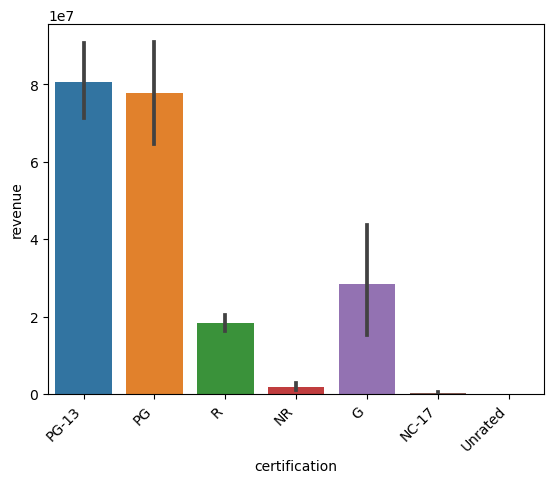

In [24]:
ax = sns.barplot(data=df_combined, x='certification', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [25]:
needed_cols = ['certification','revenue']
df_combined[needed_cols]

,certification,revenue
imdb_id,,
0,NaN,NaN
tt0312305,NaN,0.0
tt0326965,PG-13,0.0
tt0331312,NaN,0.0
tt0393049,NaN,0.0
...,...,...
tt7797790,NaN,0.0
tt8665056,NaN,0.0
tt8795764,NR,0.0


In [26]:
groups ={}

for cert in df_combined['certification'].unique():
    temp = df_combined.loc[df_combined['certification']== cert, 'revenue']
    groups[cert] = temp

groups.keys()

dict_keys([nan, 'PG-13', 'PG', 'R', 'NR', 'G', 'NC-17', 'Unrated'])

In [27]:
groups['PG-13']

imdb_id
tt0326965            0.0
tt0427152     86387857.0
tt0429493    177238796.0
tt0446029     48000000.0
tt0460778            0.0
                ...     
tt0293416      4035192.0
tt0297024            0.0
tt0322645            0.0
tt0832449            0.0
tt1073223            0.0
Name: revenue, Length: 1943, dtype: float64

In [28]:
# Loop through groups dict
for cert, data in groups.items():

    # determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    # print a statement about how many outliers for which group name
    print(f"There are {outliers.sum()} outliers in the {cert} group.")

    # Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[cert] = data

There are 0 outliers in the nan group.
There are 53 outliers in the PG-13 group.
There are 22 outliers in the PG group.
There are 77 outliers in the R group.
There are 19 outliers in the NR group.
There are 7 outliers in the G group.
There are 2 outliers in the NC-17 group.
There are 0 outliers in the Unrated group.


In [30]:
result = stats.f_oneway(df_combined['revenue'][df_combined['certification'] == 'PG-13'],
                        df_combined['revenue'][df_combined['certification'] == 'PG'],
                        df_combined['revenue'][df_combined['certification'] == 'R'],
                        df_combined['revenue'][df_combined['certification'] == 'G'],
                        df_combined['revenue'][df_combined['certification'] == 'NC-17'],
                        df_combined['revenue'][df_combined['certification'] == 'Unrated']
                       )
 
p_value = result.pvalue

In [31]:
result

F_onewayResult(statistic=60.22083117867382, pvalue=1.4133380899461044e-61)

In [32]:
# Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [33]:
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [34]:
## slice a test sector
temp = groups['PG-13']
temp

imdb_id
tt0326965            0.0
tt0427152     86387857.0
tt0429493    177238796.0
tt0446029     48000000.0
tt0460778            0.0
                ...     
tt0293416      4035192.0
tt0297024            0.0
tt0322645            0.0
tt0832449            0.0
tt1073223            0.0
Name: revenue, Length: 1890, dtype: float64

In [35]:
pd.DataFrame({'revenue':temp, 'certification':'PG-13'})

,revenue,certification
imdb_id,,
tt0326965,0.0,PG-13
tt0427152,86387857.0,PG-13
tt0429493,177238796.0,PG-13
tt0446029,48000000.0,PG-13
tt0460778,0.0,PG-13
...,...,...
tt0293416,4035192.0,PG-13
tt0297024,0.0,PG-13
tt0322645,0.0,PG-13


In [36]:
# make a list for saving the dataframes to
tukeys_dfs = []

# Loop through groups dict's items
for cert, temp in groups.items():
    
    # make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'revenue':temp, 'certification':cert})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
# concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,certification
imdb_id,,
tt0326965,0.0,PG-13
tt0427152,86387857.0,PG-13
tt0429493,177238796.0,PG-13
tt0446029,48000000.0,PG-13
tt0460778,0.0,PG-13
...,...,...
tt2982158,0.0,Unrated
tt3034146,0.0,Unrated
tt4365062,0.0,Unrated


In [37]:
values = tukeys_data['revenue']
labels = tukeys_data['certification']

tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-11929645.3205,0.7157,-34659146.0954,10799855.4544,False
G,NR,-11536977.1409,0.0854,-23888837.2806,814882.9988,False
G,PG,41456194.1923,0.0,27960749.4427,54951638.9419,True
G,PG-13,40494517.902,0.0,27978809.2503,53010226.5537,True
G,R,-1223901.3377,0.9999,-13354074.6009,10906271.9254,False
G,Unrated,-12008165.3493,0.9997,-101782500.242,77766169.5434,False
NC-17,NR,392668.1796,1.0,-19553191.9006,20338528.2598,False
NC-17,PG,53385839.5128,0.0,32712283.5918,74059395.4337,True
NC-17,PG-13,52424163.2225,0.0,32376423.9863,72471902.4587,True
NC-17,R,10705743.9827,0.6864,-9103596.966,30515084.9314,False


In [38]:
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,G,NC-17,-1.192965e+07,0.7157,-3.465915e+07,1.079986e+07,False
1,G,NR,-1.153698e+07,0.0854,-2.388884e+07,8.148830e+05,False
2,G,PG,4.145619e+07,0.0000,2.796075e+07,5.495164e+07,True
3,G,PG-13,4.049452e+07,0.0000,2.797881e+07,5.301023e+07,True
4,G,R,-1.223901e+06,0.9999,-1.335407e+07,1.090627e+07,False
5,G,Unrated,-1.200817e+07,0.9997,-1.017825e+08,7.776617e+07,False
6,NC-17,NR,3.926682e+05,1.0000,-1.955319e+07,2.033853e+07,False
7,NC-17,PG,5.338584e+07,0.0000,3.271228e+07,7.405940e+07,True
8,NC-17,PG-13,5.242416e+07,0.0000,3.237642e+07,7.247190e+07,True
9,NC-17,R,1.070574e+07,0.6864,-9.103597e+06,3.051508e+07,False


In [39]:
pd.set_option('display.max_rows',120)
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,G,NC-17,-1.192965e+07,0.7157,-3.465915e+07,1.079986e+07,False
1,G,NR,-1.153698e+07,0.0854,-2.388884e+07,8.148830e+05,False
2,G,PG,4.145619e+07,0.0000,2.796075e+07,5.495164e+07,True
3,G,PG-13,4.049452e+07,0.0000,2.797881e+07,5.301023e+07,True
4,G,R,-1.223901e+06,0.9999,-1.335407e+07,1.090627e+07,False
5,G,Unrated,-1.200817e+07,0.9997,-1.017825e+08,7.776617e+07,False
6,NC-17,NR,3.926682e+05,1.0000,-1.955319e+07,2.033853e+07,False
7,NC-17,PG,5.338584e+07,0.0000,3.271228e+07,7.405940e+07,True
8,NC-17,PG-13,5.242416e+07,0.0000,3.237642e+07,7.247190e+07,True
9,NC-17,R,1.070574e+07,0.6864,-9.103597e+06,3.051508e+07,False


C:\Users\X474241\AppData\Local\Temp\ipykernel_7428\4255432227.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(data=tukeys_data, x='certification', y='revenue', ci=68)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

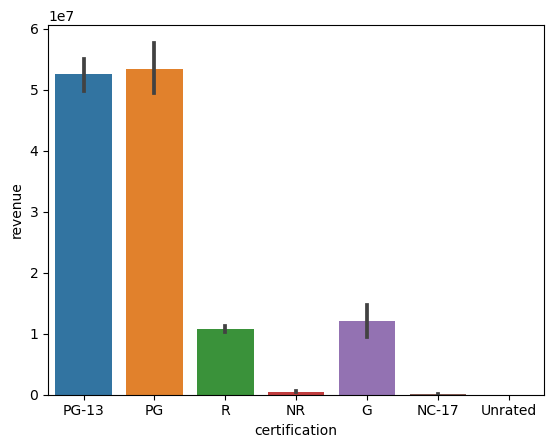

In [42]:
# make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='certification', y='revenue', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right');

In [43]:
# Not significantly different
tukeys_df[tukeys_df['reject'] ==False]

,group1,group2,meandiff,p-adj,lower,upper,reject
0,G,NC-17,-1.192965e+07,0.7157,-3.465915e+07,1.079986e+07,False
1,G,NR,-1.153698e+07,0.0854,-2.388884e+07,8.148830e+05,False
4,G,R,-1.223901e+06,0.9999,-1.335407e+07,1.090627e+07,False
5,G,Unrated,-1.200817e+07,0.9997,-1.017825e+08,7.776617e+07,False
6,NC-17,NR,3.926682e+05,1.0000,-1.955319e+07,2.033853e+07,False
9,NC-17,R,1.070574e+07,0.6864,-9.103597e+06,3.051508e+07,False
10,NC-17,Unrated,-7.852003e+04,1.0000,-9.120865e+07,9.105161e+07,False
14,NR,Unrated,-4.711882e+05,1.0000,-8.958145e+07,8.863907e+07,False
15,PG,PG-13,-9.616763e+05,0.9999,-9.171955e+06,7.248602e+06,False
17,PG,Unrated,-5.346436e+07,0.5712,-1.427403e+08,3.581160e+07,False


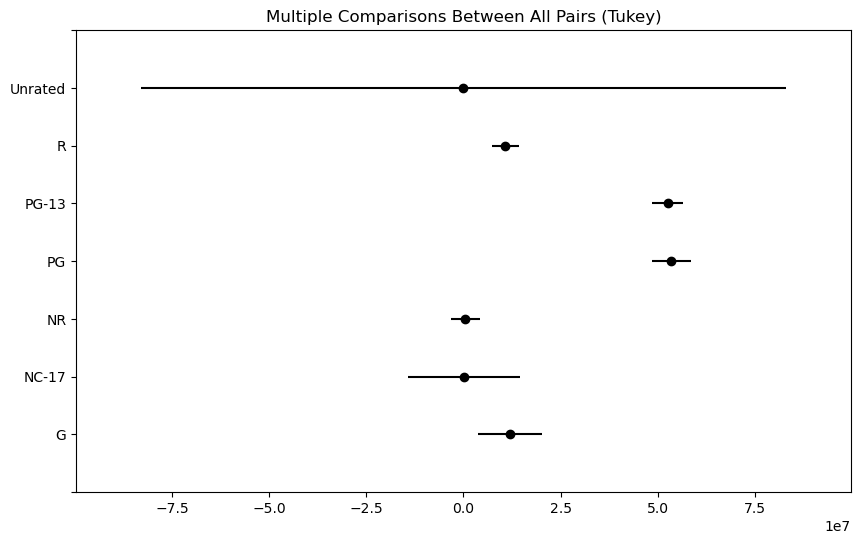

In [44]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

From the visualisation above, we can conclude and say that the null hypothesis that the null hypothesis is rejected and that the alternative hypothesis that MPAA rating of a movie significantly affects the amount of revenue the movie generates.
PG earns the most revenue

# Q2 Are some movie titles voted the most?

Null Hypothesis - All movie titles have the same votes.
Alternative Hypothesis - Some movie titles have significantly higher votes that the others.

Numerical Data
More than two groups
ANOVA test.

In [6]:
df_combined['vote_count'].describe()

count    41196.000000
mean       225.222255
std       1240.938599
min          0.000000
25%          1.000000
50%          7.000000
75%         35.000000
max      34763.000000
Name: vote_count, dtype: float64

In [7]:
df_combined['title'].value_counts()

title
Home                          8
Anna                          7
Eden                          7
Paradise                      7
Sacrifice                     7
                             ..
Tell                          1
What We Did on Our Holiday    1
Berkshire County              1
Dark Tarot                    1
Yakuza Zombie                 1
Name: count, Length: 38709, dtype: int64

In [8]:
needed_cols = ['title','vote_count']
df_combined[needed_cols]

,title,vote_count
imdb_id,,
0,NaN,NaN
tt0312305,Quantum Quest: A Cassini Space Odyssey,8.0
tt0326965,In My Sleep,33.0
tt0331312,This Wretched Life,1.0
tt0393049,Anderson's Cross,5.0
...,...,...
tt7797790,Edmund Kemper Part 3: La mort sévit,0.0
tt8665056,Guns Along The Bravo,0.0
tt8795764,New Breed,0.0


In [9]:
groups ={}

for title in df_combined['title'].unique():
    temp = df_combined.loc[df_combined['title']== title, 'vote_count']
    groups[title] = temp

groups.keys()

dict_keys([nan, 'Quantum Quest: A Cassini Space Odyssey', 'In My Sleep', 'This Wretched Life', "Anderson's Cross", 'Tangled', 'Burnt by the Sun 2: Exodus', 'Tekken', 'Disconnect', 'Venus & Vegas', 'Dinner for Schmucks', 'The A-Team', 'Toy Story 3', 'Cargo, the Lost Men', 'Seven Days', 'Scott Pilgrim vs. the World', 'Mad World', 'El hada buena - Una fábula peronista', 'The Crazies', 'Memories of Overdevelopment', 'Drunkboat', 'Satan Hates You', 'Federal', 'Piranha 3D', 'Harlem Hostel', 'Prince of Persia: The Sands of Time', 'The Deafening Silence of a Very Bright Light', 'Stiffs', 'Unstoppable', 'The Greater Meaning of Water', 'Perfect Life', 'The Losers', 'Barry Munday', 'Chasing 3000', 'The Invited', 'Furry Vengeance', 'Ramona and Beezus', 'Good Sharma', 'Love & Other Drugs', 'The Legend of Secret Pass', 'King of the Avenue', 'The Chosen Heaven', 'The Rain Fairy', 'The Illusionist', 'Night Catches Us', 'The Wolfman', 'The First Grader', '13', 'Clash of the Titans', 'Nemesis', "It's Ki

In [10]:
groups['Christmas Nightmare']

imdb_id
tt0273726    1.0
Name: vote_count, dtype: float64

In [11]:
# Loop through groups dict
for title, data in groups.items():

    # determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    # print a statement about how many outliers for which group name
    print(f"There are {outliers.sum()} outliers in the {title} group.")

    # Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[title] = data

There are 0 outliers in the nan group.
There are 0 outliers in the Quantum Quest: A Cassini Space Odyssey group.
There are 0 outliers in the In My Sleep group.
There are 0 outliers in the This Wretched Life group.
There are 0 outliers in the Anderson's Cross group.
There are 0 outliers in the Tangled group.
There are 0 outliers in the Burnt by the Sun 2: Exodus group.
There are 0 outliers in the Tekken group.
There are 0 outliers in the Disconnect group.
There are 0 outliers in the Venus & Vegas group.
There are 0 outliers in the Dinner for Schmucks group.
There are 0 outliers in the The A-Team group.
There are 0 outliers in the Toy Story 3 group.
There are 0 outliers in the Cargo, the Lost Men group.
There are 0 outliers in the Seven Days group.
There are 0 outliers in the Scott Pilgrim vs. the World group.
There are 0 outliers in the Mad World group.
There are 0 outliers in the El hada buena - Una fábula peronista group.
There are 0 outliers in the The Crazies group.
There are 0 outl

There are 0 outliers in the The Bang Bang Club group.
There are 0 outliers in the The Myth of the American Sleepover group.
There are 0 outliers in the The Four-Faced Liar group.
There are 0 outliers in the All Good Things group.
There are 0 outliers in the Dozers group.
There are 0 outliers in the Failing Better Now group.
There are 0 outliers in the The Extraordinary Adventures of Adèle Blanc-Sec group.
There are 0 outliers in the From Paris with Love group.
There are 0 outliers in the A Nightmare on Elm Street group.
There are 0 outliers in the 6 Souls group.
There are 0 outliers in the Black Death group.
There are 0 outliers in the Bunraku group.
There are 0 outliers in the Black Buenos Aires group.
There are 0 outliers in the You Will Meet a Tall Dark Stranger group.
There are 0 outliers in the Dulha Mil Gaya group.
There are 0 outliers in the The Village of Shadows group.
There are 0 outliers in the Stag Night of the Dead group.
There are 0 outliers in the Mr. Nice group.
There a

There are 0 outliers in the Summer Eleven group.
There are 0 outliers in the References group.
There are 0 outliers in the Growing Up Greek in America II group.
There are 0 outliers in the Jack Goes Boating group.
There are 0 outliers in the Sound of Noise group.
There are 0 outliers in the Date Night group.
There are 0 outliers in the Anton Chekhov's The Duel group.
There are 0 outliers in the Trooper group.
There are 0 outliers in the Cefalópodo group.
There are 0 outliers in the Easy A group.
There are 0 outliers in the Sweet Evil group.
There are 0 outliers in the The Strange Case of Angelica group.
There are 0 outliers in the A Numbers Game group.
There are 0 outliers in the Supreme Champion group.
There are 0 outliers in the Burning Palms group.
There are 0 outliers in the One Long Day group.
There are 0 outliers in the The Social Network group.
There are 0 outliers in the The Awkward Comedy Show group.
There are 0 outliers in the Ghosts Don't Exist group.
There are 0 outliers in

There are 0 outliers in the Defcon 2012 group.
There are 0 outliers in the Everything Will Happen Before You Die group.
There are 0 outliers in the Luster group.
There are 0 outliers in the Pyaar Impossible! group.
There are 0 outliers in the Psychosis group.
There are 0 outliers in the Lullaby for Pi group.
There are 0 outliers in the Nude Nuns with Big Guns group.
There are 0 outliers in the Surviving Life (Theory and Practice) group.
There are 0 outliers in the Jordan group.
There are 0 outliers in the Feed the Fish group.
There are 0 outliers in the The Third Testament group.
There are 0 outliers in the I'm Still Here group.
There are 0 outliers in the The Chameleon group.
There are 0 outliers in the Rust group.
There are 0 outliers in the The Extra Man group.
There are 0 outliers in the The Fallen Angel group.
There are 0 outliers in the Max Schmeling group.
There are 0 outliers in the The Silence group.
There are 0 outliers in the Some Other Stories group.
There are 0 outliers in

There are 0 outliers in the Apartment group.
There are 0 outliers in the Skeletons group.
There are 0 outliers in the BearCity group.
There are 0 outliers in the Unrivaled group.
There are 0 outliers in the Leonie group.
There are 0 outliers in the War Machine group.
There are 0 outliers in the Quitting group.
There are 0 outliers in the We Are Family group.
There are 0 outliers in the Africa United group.
There are 0 outliers in the Alien Opponent group.
There are 0 outliers in the Small Town Murder Songs group.
There are 0 outliers in the Rio Sex Comedy group.
There are 0 outliers in the Snowflake, the White Gorilla group.
There are 0 outliers in the 1,001 Ways to Enjoy the Missionary Position group.
There are 0 outliers in the Karla & Jonas group.
There are 0 outliers in the WWJD: What Would Jesus Do? group.
There are 0 outliers in the Forget Me Not group.
There are 0 outliers in the No Problem group.
There are 0 outliers in the Perfect Combination group.
There are 0 outliers in the

There are 0 outliers in the Stars to Wish Upon group.
There are 0 outliers in the Spilt Milk group.
There are 0 outliers in the The Owls group.
There are 0 outliers in the Friends and Lovers group.
There are 0 outliers in the Hopeful Notes group.
There are 0 outliers in the Basement group.
There are 0 outliers in the Virus X group.
There are 0 outliers in the Janie Jones group.
There are 0 outliers in the Look, Stranger group.
There are 0 outliers in the Genitori & figli:) - Agitare bene prima dell'uso group.
There are 0 outliers in the La nostra vita group.
There are 0 outliers in the Wandering Streams group.
There are 0 outliers in the Aisha group.
There are 0 outliers in the La scuola è finita group.
There are 0 outliers in the Living on Love Alone group.
There are 0 outliers in the Griff the Invisible group.
There are 0 outliers in the Top Floor Left Wing group.
There are 0 outliers in the After the Waterfall group.
There are 0 outliers in the Third Star group.
There are 0 outliers

There are 0 outliers in the The Kane Files: Life of Trial group.
There are 0 outliers in the Book Girl group.
There are 0 outliers in the A Yakuza's Daughter Never Cries group.
There are 0 outliers in the Trick the Movie: Psychic Battle Royale group.
There are 0 outliers in the Martha group.
There are 0 outliers in the Naked Nerve Endings group.
There are 0 outliers in the Unlikely Revolutionaries group.
There are 0 outliers in the Woman of My Life group.
There are 0 outliers in the Siren group.
There are 0 outliers in the Babylon Central group.
There are 0 outliers in the Chase the Slut group.
There are 0 outliers in the The Builder group.
There are 0 outliers in the Pure Country 2: The Gift group.
There are 0 outliers in the I Didn't Come Here to Die group.
There are 0 outliers in the White Irish Drinkers group.
There are 0 outliers in the The Little Death group.
There are 0 outliers in the Grim group.
There are 0 outliers in the Freak Dance group.
There are 0 outliers in the Abacus 

There are 0 outliers in the Insidious group.
There are 0 outliers in the It Begins with the End group.
There are 0 outliers in the The Killing of Jacob Marr group.
There are 0 outliers in the Meat group.
There are 0 outliers in the The Defiled group.
There are 0 outliers in the Blessed and Cursed group.
There are 0 outliers in the Zero 2 group.
There are 0 outliers in the Alien vs. Ninja group.
There are 0 outliers in the The Guide group.
There are 0 outliers in the Do You See Colors When You Close Your Eyes? group.
There are 0 outliers in the Score: A Hockey Musical group.
There are 0 outliers in the Browncoats: Redemption group.
There are 0 outliers in the Killer Shorts 2 group.
There are 0 outliers in the Twisted Seduction group.
There are 0 outliers in the Breaking News group.
There are 0 outliers in the With Love... from the Age of Reason group.
There are 0 outliers in the Susa group.
There are 0 outliers in the L.A. Zombie group.
There are 0 outliers in the Chase group.
There are

There are 0 outliers in the Sandcastle group.
There are 0 outliers in the Lost Love Murder group.
There are 0 outliers in the I'm Not Jesus Mommy group.
There are 0 outliers in the Red Gloves group.
There are 0 outliers in the Paname group.
There are 0 outliers in the Paranormal Calamity group.
There are 0 outliers in the Sybil Ludington group.
There are 0 outliers in the Life, Above All group.
There are 0 outliers in the My Joy group.
There are 0 outliers in the October group.
There are 0 outliers in the Chongqing Blues group.
There are 0 outliers in the Lights Out group.
There are 0 outliers in the Those People group.
There are 0 outliers in the HipHop Express group.
There are 0 outliers in the Love in Disguise group.
There are 0 outliers in the Outbound group.
There are 0 outliers in the Open Season 3 group.
There are 0 outliers in the 5x Favela, Now by Ourselves group.
There are 0 outliers in the The Joy group.
There are 0 outliers in the Bedevilled group.
There are 0 outliers in t

There are 0 outliers in the Diago group.
There are 0 outliers in the Another Sky group.
There are 0 outliers in the La banda dei Babbi Natale group.
There are 0 outliers in the The Black Sheep group.
There are 0 outliers in the Men Vs Women group.
There are 0 outliers in the Monster Heroes group.
There are 0 outliers in the Notizie degli scavi group.
There are 0 outliers in the Klown group.
There are 0 outliers in the Penpattanam group.
There are 0 outliers in the Brando Unauthorized group.
There are 0 outliers in the Yoko Namino 2: Love Is Over group.
There are 0 outliers in the Ultraman Zero: The Revenge of Belial group.
There are 0 outliers in the Taipei Exchanges group.
There are 0 outliers in the Glass Tiger 3 group.
There are 0 outliers in the There Are Things You Don't Know group.
There are 0 outliers in the Mother Teresa of Cats group.
There are 0 outliers in the Tacho group.
There are 0 outliers in the Territories group.
There are 0 outliers in the Thomas & Friends: Misty Isla

There are 0 outliers in the Night and Day group.
There are 0 outliers in the The Golden Pomegranate group.
There are 0 outliers in the Wendigo: Bound by Blood group.
There are 0 outliers in the A Stone's Throw Away group.
There are 0 outliers in the Anarchy Girls group.
There are 0 outliers in the Angadi Theru group.
There are 0 outliers in the Porkchop group.
There are 0 outliers in the Hair group.
There are 0 outliers in the War of Love group.
There are 0 outliers in the The Deadlines group.
There are 0 outliers in the Showtime group.
There are 0 outliers in the Variations on a High School Romance group.
There are 0 outliers in the Inadequate People group.
There are 0 outliers in the The Butcher, the Chef, and the Swordsman group.
There are 0 outliers in the Home for Christmas group.
There are 0 outliers in the Black Ocean group.
There are 0 outliers in the State of Violence group.
There are 0 outliers in the Heavy Times group.
There are 0 outliers in the Reverse Motion group.
There 

There are 0 outliers in the Morning Funeral group.
There are 0 outliers in the Motion Sickness group.
There are 0 outliers in the 26 Happiness Road group.
There are 0 outliers in the Cairo 6,7,8 group.
There are 0 outliers in the Future World: City of Mass Destruction group.
There are 0 outliers in the Please Don't Disturb group.
There are 0 outliers in the Subconscious group.
There are 0 outliers in the The Return of Post Apocalyptic Cowgirls group.
There are 0 outliers in the The School in the Woods group.
There are 0 outliers in the Metal Messiah group.
There are 0 outliers in the One Year group.
There are 0 outliers in the BKO: Bangkok Knockout group.
There are 0 outliers in the Senior Year group.
There are 0 outliers in the The 70% Club group.
There are 0 outliers in the Fin Décembre group.
There are 0 outliers in the Floating Lives group.
There are 0 outliers in the Lover's Discourse group.
There are 0 outliers in the Identity Card group.
There are 0 outliers in the Sella Turcica

There are 0 outliers in the History of Christian Worship: Part 1, The Word group.
There are 0 outliers in the 28 Hours Later: The Zombie Movie group.
There are 0 outliers in the Gandu group.
There are 0 outliers in the Foreigner group.
There are 0 outliers in the The Unjust group.
There are 0 outliers in the The Bucks County Massacre group.
There are 0 outliers in the Green group.
There are 0 outliers in the Nothing group.
There are 0 outliers in the Ashamed group.
There are 0 outliers in the Natalie group.
There are 0 outliers in the Troubleshooter group.
There are 0 outliers in the Hello Ghost group.
There are 0 outliers in the The Report of a Celebration group.
There are 0 outliers in the Marham group.
There are 0 outliers in the Fake Blood group.
There are 0 outliers in the co2 group.
There are 0 outliers in the Neverquiet (Film of Wonders) group.
There are 0 outliers in the Lost Dogs group.
There are 0 outliers in the Who is Jose Luck group.
There are 0 outliers in the Pay Back gr

There are 0 outliers in the Re-encounter group.
There are 0 outliers in the A Knock At The Door group.
There are 0 outliers in the You Deserve To Be Single group.
There are 0 outliers in the Reincarnate group.
There are 0 outliers in the Tarda estate group.
There are 0 outliers in the Police Police group.
There are 0 outliers in the The Boy from Ipanema group.
There are 0 outliers in the GACHI-BAN MAX2 group.
There are 0 outliers in the Running Inside Out group.
There are 0 outliers in the Third Floor group.
There are 0 outliers in the The Way I See It group.
There are 0 outliers in the God's Blood group.
There are 0 outliers in the Anne of Green Gables: Road to Green Gables group.
There are 0 outliers in the Fireplace for Your Home: Christmas Music group.
There are 0 outliers in the Thamizh Padam group.
There are 0 outliers in the Sin Sisters 2 group.
There are 0 outliers in the Zorro and Scarlet Whip Revealed! group.
There are 0 outliers in the For Such A Time group.
There are 0 outl

There are 0 outliers in the Straw Dogs group.
There are 0 outliers in the My Father's Will group.
There are 0 outliers in the If You Only Knew group.
There are 0 outliers in the The Iron Lady group.
There are 0 outliers in the Session group.
There are 0 outliers in the The Incident group.
There are 0 outliers in the Tied to a Chair group.
There are 0 outliers in the Inseparable group.
There are 0 outliers in the The Descendants group.
There are 0 outliers in the Bad Meat group.
There are 0 outliers in the 1-900-TONIGHT (Somewhere Tonight) group.
There are 0 outliers in the The Eagle group.
There are 0 outliers in the Manipulation group.
There are 0 outliers in the Wasteland group.
There are 0 outliers in the You and I group.
There are 0 outliers in the Boy Toy group.
There are 0 outliers in the The Big Year group.
There are 0 outliers in the Dreams Awake group.
There are 0 outliers in the National Lampoon's The Legend of Awesomest Maximus group.
There are 0 outliers in the The Ascensio

There are 0 outliers in the Alois Nebel group.
There are 0 outliers in the Lipstikka group.
There are 0 outliers in the The Prodigies group.
There are 0 outliers in the Prairie Love group.
There are 0 outliers in the Simon & the Oaks group.
There are 0 outliers in the Beach Bar: The Movie group.
There are 0 outliers in the Rid of Me group.
There are 0 outliers in the Play group.
There are 0 outliers in the You May Not Kiss the Bride group.
There are 0 outliers in the Jack Falls group.
There are 0 outliers in the Hella W group.
There are 0 outliers in the The Phantom Father group.
There are 0 outliers in the Hit List group.
There are 0 outliers in the Is This a Joke? group.
There are 0 outliers in the Deuce of Spades group.
There are 0 outliers in the Death of a Superhero group.
There are 0 outliers in the Stormland group.
There are 0 outliers in the The Adjustment Bureau group.
There are 0 outliers in the Infection: The Invasion Begins group.
There are 0 outliers in the Time Again grou

There are 0 outliers in the The Blood Bond group.
There are 0 outliers in the A Warm Wind group.
There are 0 outliers in the Anonymous group.
There are 0 outliers in the Nightfur group.
There are 0 outliers in the The Apocolypse According To Doris group.
There are 0 outliers in the The Bunny Game group.
There are 0 outliers in the Answers to Nothing group.
There are 0 outliers in the 1 Out of 7 group.
There are 0 outliers in the Butterfly Rising group.
There are 0 outliers in the Collapse group.
There are 0 outliers in the Orcs! group.
There are 0 outliers in the In Memoriam group.
There are 0 outliers in the 15 Lads group.
There are 0 outliers in the The Prize group.
There are 0 outliers in the Gantz: Perfect Answer group.
There are 0 outliers in the Gun Hill Road group.
There are 0 outliers in the The Caller group.
There are 0 outliers in the The End of Silence group.
There are 0 outliers in the Melancholia group.
There are 0 outliers in the Magic Valley group.
There are 0 outliers i

There are 0 outliers in the Albert Nobbs group.
There are 0 outliers in the The Last Look group.
There are 0 outliers in the Prom group.
There are 0 outliers in the Vares: The Kiss of Evil group.
There are 0 outliers in the The Monk group.
There are 0 outliers in the The Woman in the Fifth group.
There are 0 outliers in the Midnight in Paris group.
There are 0 outliers in the The Last Ride group.
There are 0 outliers in the That's What I Am group.
There are 0 outliers in the Cherry Bomb group.
There are 0 outliers in the My Way group.
There are 0 outliers in the Garbage Prince group.
There are 0 outliers in the All Things Fall Apart group.
There are 0 outliers in the Win Win group.
There are 0 outliers in the Tomorrow's Joe Live Action Movie group.
There are 0 outliers in the Sixpack group.
There are 0 outliers in the A Heaven for Queers group.
There are 0 outliers in the On the Beat group.
There are 0 outliers in the Fall Away group.
There are 0 outliers in the Language of a Broken He

There are 0 outliers in the Surrogate Valentine group.
There are 0 outliers in the Heat Wave group.
There are 0 outliers in the Bloody Sin: Abonimations of the Third Reich group.
There are 0 outliers in the La vita facile group.
There are 0 outliers in the Corrode group.
There are 0 outliers in the Make a Fake group.
There are 0 outliers in the The Dealer  Plate group.
There are 0 outliers in the Miles from Anywhere group.
There are 0 outliers in the Final Balance group.
There are 0 outliers in the Vito Bonafacci group.
There are 0 outliers in the The Chateau Meroux group.
There are 0 outliers in the CornerStore group.
There are 0 outliers in the Habibi group.
There are 0 outliers in the In His Chart group.
There are 0 outliers in the Milk group.
There are 0 outliers in the American Animal group.
There are 0 outliers in the Familiar Grounds group.
There are 0 outliers in the A Butterfly Kiss group.
There are 0 outliers in the If Not Us, Who? group.
There are 0 outliers in the Occupant 

There are 0 outliers in the Dragon group.
There are 0 outliers in the A Night in the Woods group.
There are 0 outliers in the Crash Site group.
There are 0 outliers in the Jamie and Jessie Are Not Together group.
There are 0 outliers in the My Worst Nightmare group.
There are 0 outliers in the 3 Times a Charm group.
There are 0 outliers in the Another Happy Day group.
There are 0 outliers in the Pimp Bullies group.
There are 0 outliers in the Snow on tha Bluff group.
There are 0 outliers in the Heleno group.
There are 0 outliers in the Mimesis group.
There are 0 outliers in the Munger Road group.
There are 0 outliers in the October Baby group.
There are 0 outliers in the At River's Edge group.
There are 0 outliers in the Thank You group.
There are 0 outliers in the The Green group.
There are 0 outliers in the Friends with Kids group.
There are 0 outliers in the Cut group.
There are 0 outliers in the Tormented group.
There are 0 outliers in the Born to Ride group.
There are 0 outliers i

There are 0 outliers in the Cassadaga group.
There are 0 outliers in the Dick Night group.
There are 0 outliers in the Three Quarter Moon group.
There are 0 outliers in the Frankenstein Day of the Beast group.
There are 0 outliers in the Identical group.
There are 0 outliers in the Meanwhile group.
There are 0 outliers in the Peach Plum Pear group.
There are 0 outliers in the Forbidden House group.
There are 0 outliers in the Setup group.
There are 0 outliers in the Sound of My Voice group.
There are 0 outliers in the Brooklyn Brothers Beat the Best group.
There are 0 outliers in the August group.
There are 0 outliers in the Backstabber group.
There are 0 outliers in the Birds of a Feather group.
There are 0 outliers in the Black Brown White group.
There are 0 outliers in the Paradise Broken group.
There are 0 outliers in the Center of Gravity group.
There are 0 outliers in the David group.
There are 0 outliers in the Wok the Kasbah group.
There are 0 outliers in the Down the Road Agai

There are 0 outliers in the Dans la tourmente group.
There are 0 outliers in the The Alumni Chapter group.
There are 0 outliers in the The Glass Man group.
There are 0 outliers in the The Crying Dead group.
There are 0 outliers in the Amnesty group.
There are 0 outliers in the The Fatherless group.
There are 0 outliers in the Frankie in Blunderland group.
There are 0 outliers in the Humans vs Zombies group.
There are 0 outliers in the One Day More group.
There are 0 outliers in the All's Well, Ends Well 2011 group.
There are 0 outliers in the The Crown Jewels group.
There are 0 outliers in the Beloved group.
There are 0 outliers in the Malaventura group.
There are 0 outliers in the Native group.
There are 0 outliers in the Artificial Paradises group.
There are 0 outliers in the Sadomaster 2: Total Mayhem group.
There are 0 outliers in the Welcome Papa group.
There are 0 outliers in the Emancipation group.
There are 0 outliers in the Cat Scratch Fever group.
There are 0 outliers in the 

There are 0 outliers in the Aarakshan group.
There are 0 outliers in the Life Back Then group.
There are 0 outliers in the Claustrofobia group.
There are 0 outliers in the Crawl group.
There are 0 outliers in the Moonlight Mask group.
There are 0 outliers in the Legend of the Millennium Dragon group.
There are 0 outliers in the Vance and Pepe group.
There are 0 outliers in the Takhan Teish group.
There are 0 outliers in the The Finger group.
There are 0 outliers in the Mikey's Extreme Romance group.
There are 0 outliers in the Mr. Bricks: A Heavy Metal Murder Musical group.
There are 0 outliers in the Puzzled Love group.
There are 0 outliers in the Thirteen 59 group.
There are 0 outliers in the Wild 7 group.
There are 0 outliers in the Fight the Fight group.
There are 0 outliers in the Doraemon: Nobita and the New Steel Troops: Winged Angels group.
There are 0 outliers in the Ko group.
There are 0 outliers in the Elza group.
There are 0 outliers in the The Snows of Kilimanjaro group.
T

There are 0 outliers in the 19 Doors group.
There are 0 outliers in the An Assassin group.
There are 0 outliers in the Exsanguination group.
There are 0 outliers in the Tracks Kong Lingxue group.
There are 0 outliers in the Tokyo Playboy Club group.
There are 0 outliers in the The Raid group.
There are 0 outliers in the Paradise group.
There are 0 outliers in the Area 51 Confidential group.
There are 0 outliers in the Coup d'éclat group.
There are 0 outliers in the Delsin group.
There are 0 outliers in the Himizu group.
There are 0 outliers in the Invisible Ink group.
There are 0 outliers in the The Grand Theft group.
There are 0 outliers in the Vares: Garter Snake group.
There are 0 outliers in the Akkarakazhchakal - The Movie group.
There are 0 outliers in the China Town group.
There are 0 outliers in the Between Night and Day group.
There are 0 outliers in the Spots group.
There are 0 outliers in the Kaiji 2: The Ultimate Gambler group.
There are 0 outliers in the The Nocturnal Thir

There are 0 outliers in the Play It Like Godard group.
There are 0 outliers in the Black Heart group.
There are 0 outliers in the Mavi Pansiyon group.
There are 0 outliers in the Decalogue group.
There are 0 outliers in the Hut in the Woods group.
There are 0 outliers in the Pick the Youth group.
There are 0 outliers in the Autoerotic group.
There are 0 outliers in the Sex, Lies and Death group.
There are 0 outliers in the A Swingin' Trio group.
There are 0 outliers in the Policeman group.
There are 0 outliers in the Last Ride group.
There are 0 outliers in the The Legend of the Psychotic Forest Ranger group.
There are 0 outliers in the Weekend Killer group.
There are 0 outliers in the Question Mark group.
There are 0 outliers in the Beyond Acceptance group.
There are 0 outliers in the Pocong Mandi Goyang Pinggul group.
There are 0 outliers in the Daddy group.
There are 0 outliers in the Ella And Aleksi - Surprise Birthday Party group.
There are 0 outliers in the No Reply group.
There 

There are 0 outliers in the You Are My Pet group.
There are 0 outliers in the Bad to the Jones group.
There are 0 outliers in the Bunohan: Return to Murder group.
There are 0 outliers in the Geezas group.
There are 0 outliers in the The Showdown group.
There are 0 outliers in the Jonas group.
There are 0 outliers in the 11 Flowers group.
There are 0 outliers in the Arrgh! A Pirate Story group.
There are 0 outliers in the Coming Home group.
There are 0 outliers in the Rough Hands group.
There are 0 outliers in the Mr. Tree group.
There are 0 outliers in the Found Memories group.
There are 0 outliers in the Lost in Paradise group.
There are 0 outliers in the Islands group.
There are 0 outliers in the Man On Ground group.
There are 0 outliers in the Twilight Portrait group.
There are 0 outliers in the Rose group.
There are 0 outliers in the Skunk Ape Hunters in Texas group.
There are 0 outliers in the Swirl group.
There are 0 outliers in the Last Days in Jerusalem group.
There are 0 outli

There are 0 outliers in the Ryang-kang-do: Merry Christmas, North! group.
There are 0 outliers in the The War of 1812 group.
There are 0 outliers in the The Sky of My Childhood group.
There are 0 outliers in the Three Sisters T group.
There are 0 outliers in the Dangerously Excited group.
There are 0 outliers in the Là-bas: A Criminal Education group.
There are 0 outliers in the Punch group.
There are 0 outliers in the Holiday Beach group.
There are 0 outliers in the SafeWord group.
There are 0 outliers in the Wind and Fog group.
There are 0 outliers in the Female Prisoner 701: Sasori group.
There are 0 outliers in the Old Dog group.
There are 0 outliers in the Bread and Circuses group.
There are 0 outliers in the Zombie Dawn group.
There are 0 outliers in the Zomvideo group.
There are 0 outliers in the The Adventures of Buckskin Jack and the Legend of the Fully Grooved Axe group.
There are 0 outliers in the Caveat group.
There are 0 outliers in the Head group.
There are 0 outliers in 

There are 0 outliers in the The Broke group.
There are 0 outliers in the Slaughter Claus group.
There are 0 outliers in the The 99 Unbound group.
There are 0 outliers in the The End of Puberty group.
There are 0 outliers in the One. Two. One group.
There are 0 outliers in the Scattered Explorations group.
There are 0 outliers in the Del Shores: My Sordid Life group.
There are 0 outliers in the The Inspector group.
There are 0 outliers in the Of Starlight group.
There are 0 outliers in the TSY: Time Slip Yankee group.
There are 0 outliers in the Video Nasty group.
There are 0 outliers in the The Idea Thief group.
There are 0 outliers in the Self-Referential Traverse: zeitgeist and engagement group.
There are 0 outliers in the Return to Blood Fart Lake group.
There are 0 outliers in the Diamond Flash group.
There are 0 outliers in the Ayah, Mengapa Aku Berbeda? group.
There are 0 outliers in the Euphoria group.
There are 0 outliers in the Henge group.
There are 0 outliers in the Frankens

There are 0 outliers in the The Amazing Adventures of the Living Corpse group.
There are 0 outliers in the Skyfall group.
There are 0 outliers in the Dark Shadows group.
There are 0 outliers in the The Girl from the Naked Eye group.
There are 0 outliers in the Richness of Internal Space group.
There are 0 outliers in the The Dark Side of Love group.
There are 0 outliers in the Buzzkill group.
There are 0 outliers in the Cut/Print group.
There are 0 outliers in the Between Us group.
There are 0 outliers in the Mr. Happy group.
There are 0 outliers in the Art of Submission group.
There are 0 outliers in the The Factory group.
There are 0 outliers in the Lay the Favorite group.
There are 0 outliers in the Frankenweenie group.
There are 0 outliers in the Perfection group.
There are 0 outliers in the The Extravagant Shadows group.
There are 0 outliers in the Ron and Justin group.
There are 0 outliers in the Natural Burials group.
There are 0 outliers in the Little Big Boy group.
There are 0

There are 0 outliers in the The Devil Inside group.
There are 0 outliers in the Casablanca mon amour group.
There are 0 outliers in the Bloodwork group.
There are 0 outliers in the Wedding Day group.
There are 0 outliers in the In Montauk group.
There are 0 outliers in the Piazza Fontana: The Italian Conspiracy group.
There are 0 outliers in the Reclusion group.
There are 0 outliers in the For Greater Glory: The True Story of Cristiada group.
There are 0 outliers in the Day of the Flowers group.
There are 0 outliers in the Portrait of a Zombie group.
There are 0 outliers in the Born & Raised group.
There are 0 outliers in the Get the Gringo group.
There are 0 outliers in the Man on a Ledge group.
There are 0 outliers in the The Mooring group.
There are 0 outliers in the Changing the Game group.
There are 0 outliers in the For Ellen group.
There are 0 outliers in the Feed Me with Your Words group.
There are 0 outliers in the Measuring the World group.
There are 0 outliers in the Robin H

There are 0 outliers in the Piranha 3DD group.
There are 0 outliers in the Beauty and the Least group.
There are 0 outliers in the Midnight's Children group.
There are 0 outliers in the The Watermen group.
There are 0 outliers in the Bending The Rules group.
There are 0 outliers in the The Discoverers group.
There are 0 outliers in the People Like Us group.
There are 0 outliers in the Solomon Grundy group.
There are 0 outliers in the Generation Um... group.
There are 0 outliers in the Detroit Unleaded group.
There are 0 outliers in the StreetDance 2 group.
There are 0 outliers in the The Grief Tourist group.
There are 0 outliers in the Pennhurst group.
There are 0 outliers in the Mariage à Mendoza group.
There are 0 outliers in the All you can dream group.
There are 0 outliers in the Exit Strategy group.
There are 0 outliers in the HOUBA! On the Trail of the Marsupilami group.
There are 0 outliers in the Beyond Outrage group.
There are 0 outliers in the Bread of Happiness group.
There 

There are 0 outliers in the A Perfect Ending group.
There are 0 outliers in the Always: Sunset on Third Street '64 group.
There are 0 outliers in the Flying Blind group.
There are 0 outliers in the Greetings from Tim Buckley group.
There are 0 outliers in the Mountain of Gold group.
There are 0 outliers in the The Inflicted group.
There are 0 outliers in the KWAK or Kassandra with a K group.
There are 0 outliers in the Hayabusa: The Long Voyage Home group.
There are 0 outliers in the The Next Day group.
There are 0 outliers in the Here Below group.
There are 0 outliers in the California Winter group.
There are 0 outliers in the Soulless group.
There are 0 outliers in the Petunia group.
There are 0 outliers in the Of All the Things group.
There are 0 outliers in the The Becoming 2015 group.
There are 0 outliers in the The End of Love group.
There are 0 outliers in the Spike Island group.
There are 0 outliers in the Cinema Six group.
There are 0 outliers in the In the Hive group.
There a

There are 0 outliers in the Sawney: Flesh of Man group.
There are 0 outliers in the The Legend of Kaspar Hauser group.
There are 0 outliers in the Ambush at Dark Canyon group.
There are 0 outliers in the Ustanicka Street group.
There are 0 outliers in the Crawlspace group.
There are 0 outliers in the The Dead Man and Being Happy group.
There are 0 outliers in the Halley group.
There are 0 outliers in the Lost Lake group.
There are 0 outliers in the Nor'easter group.
There are 0 outliers in the Another group.
There are 0 outliers in the It Was the Son group.
There are 0 outliers in the The Day of the Crows group.
There are 0 outliers in the Quiz group.
There are 0 outliers in the Beyond the Trophy group.
There are 0 outliers in the Ace Attorney group.
There are 0 outliers in the ACAB : All Cops Are Bastards group.
There are 0 outliers in the Frost Bite group.
There are 0 outliers in the Lukewarm group.
There are 0 outliers in the Freedom Force group.
There are 0 outliers in the Cowgirls

There are 0 outliers in the Satellite of Love group.
There are 0 outliers in the Tai Chi Zero group.
There are 0 outliers in the The Rise group.
There are 0 outliers in the Pitch Perfect group.
There are 0 outliers in the True Bloodthirst group.
There are 0 outliers in the Among Friends group.
There are 0 outliers in the Excision group.
There are 0 outliers in the Masterminds group.
There are 0 outliers in the Atlas Shrugged: Part II group.
There are 0 outliers in the The Last Fall group.
There are 0 outliers in the Aaron's House group.
There are 0 outliers in the The Wild Children group.
There are 0 outliers in the A Perfect Plan group.
There are 0 outliers in the Hijacked group.
There are 0 outliers in the Storage 24 group.
There are 0 outliers in the 7 Below group.
There are 0 outliers in the Chained group.
There are 0 outliers in the Dead Before Dawn group.
There are 0 outliers in the Dead Money group.
There are 0 outliers in the Interludes group.
There are 0 outliers in the Red Ho

There are 0 outliers in the All Wifed Out group.
There are 0 outliers in the Babygirl group.
There are 0 outliers in the Country Girl group.
There are 0 outliers in the Nativity 2: Danger in the Manger! group.
There are 0 outliers in the The Men of Dodge City group.
There are 0 outliers in the The Row group.
There are 0 outliers in the Undocumented Executive group.
There are 0 outliers in the A Green Story group.
There are 0 outliers in the Francis of Brooklyn group.
There are 0 outliers in the My Straight Son group.
There are 0 outliers in the Bindlestiffs group.
There are 0 outliers in the Easton's Article group.
There are 0 outliers in the I Am Not a Hipster group.
There are 0 outliers in the New Hope group.
There are 0 outliers in the To Redemption group.
There are 0 outliers in the Promised Land group.
There are 0 outliers in the Dead Europe group.
There are 0 outliers in the What Richard Did group.
There are 0 outliers in the Crazy Dog group.
There are 0 outliers in the Placebo g

There are 0 outliers in the Beautiful World group.
There are 0 outliers in the Young Dudes group.
There are 0 outliers in the Dar He: The Lynching of Emmett Till group.
There are 0 outliers in the The Last Step group.
There are 0 outliers in the Art of Darkness group.
There are 0 outliers in the Padak group.
There are 0 outliers in the When Night Falls group.
There are 0 outliers in the Rock the Casbah group.
There are 0 outliers in the God's Neighbors group.
There are 0 outliers in the Single Plus group.
There are 0 outliers in the 29000 Wishes, 1 Regret group.
There are 0 outliers in the Crazy and Thief group.
There are 0 outliers in the Drug War group.
There are 0 outliers in the Flamingos group.
There are 0 outliers in the Like the Water group.
There are 0 outliers in the Stars 80 group.
There are 0 outliers in the Khiladi 786 group.
There are 0 outliers in the The Good Wifey group.
There are 0 outliers in the Good luck group.
There are 0 outliers in the Egg and Stone group.
There 

There are 0 outliers in the The Four group.
There are 0 outliers in the Closed Season group.
There are 0 outliers in the The Devil's Carnival group.
There are 0 outliers in the Malaikat Tanpa Sayap group.
There are 0 outliers in the #republicoftwitter group.
There are 0 outliers in the Room 514 group.
There are 0 outliers in the Rise of the Black Bat group.
There are 0 outliers in the Joe Satriani: Satchurated - Live in Montreal group.
There are 0 outliers in the Stuck in Love group.
There are 0 outliers in the Puella Magi Madoka Magica the Movie Part I: Beginnings group.
There are 0 outliers in the In Over My Head group.
There are 0 outliers in the Lost in Reality group.
There are 0 outliers in the I'm That Kind of Woman group.
There are 0 outliers in the The Obama Effect group.
There are 0 outliers in the I Am a Director group.
There are 0 outliers in the Where the Fire Burns group.
There are 0 outliers in the Jigsaw Puzzle group.
There are 0 outliers in the Move group.
There are 0 o

There are 0 outliers in the Rufus group.
There are 0 outliers in the My Romance with Life group.
There are 0 outliers in the Show Me Your Glory: The Movie group.
There are 0 outliers in the Killjoy Goes to Hell group.
There are 0 outliers in the The Last Movie group.
There are 0 outliers in the Slug Street Scrappers: Rise of Ryuken group.
There are 0 outliers in the Hate Crime group.
There are 0 outliers in the 8 First Dates group.
There are 0 outliers in the Beyond the Hills group.
There are 0 outliers in the Eega group.
There are 0 outliers in the Iconoclast group.
There are 0 outliers in the The Sinkholes group.
There are 0 outliers in the Red Balls group.
There are 0 outliers in the The Freeway group.
There are 0 outliers in the The Riverbed group.
There are 0 outliers in the The Complex group.
There are 0 outliers in the Wadjda group.
There are 0 outliers in the Caught in the Web group.
There are 0 outliers in the Bir Ses Böler Geceyi group.
There are 0 outliers in the Hitman grou

There are 0 outliers in the WE: A Collection of Individuals group.
There are 0 outliers in the Double Wide Blues group.
There are 0 outliers in the In Carcosa group.
There are 0 outliers in the Tennessee Queer group.
There are 0 outliers in the Hickory Never Bleeds group.
There are 0 outliers in the 12/12/12 group.
There are 0 outliers in the Los Malagradecidos group.
There are 0 outliers in the A Werewolf Boy group.
There are 0 outliers in the Adventures of Bailey: Christmas Hero group.
There are 0 outliers in the Ante’ group.
There are 0 outliers in the Creatures of Destiny group.
There are 0 outliers in the Andala Rakshasi group.
There are 0 outliers in the What She Wants for Christmas group.
There are 0 outliers in the Paranormal Adoption group.
There are 0 outliers in the Sons of Ram group.
There are 0 outliers in the The Stray group.
There are 0 outliers in the Vicky Donor group.
There are 0 outliers in the I Love Hong Kong 2012 group.
There are 0 outliers in the The Rakugo Movie

There are 0 outliers in the I Do Bidoo Bidoo: Heto nApo sila! group.
There are 0 outliers in the Eyam group.
There are 0 outliers in the Munch!? group.
There are 0 outliers in the West Lincoln group.
There are 0 outliers in the Zombies vs. Strippers group.
There are 0 outliers in the Chaos group.
There are 0 outliers in the The Scent group.
There are 0 outliers in the Keys to the City group.
There are 0 outliers in the Dating A Zombie group.
There are 0 outliers in the After the Battle group.
There are 0 outliers in the Playground Chronicles group.
There are 0 outliers in the After Lucia group.
There are 0 outliers in the Precure All Stars New Stage: Friends of the Future group.
There are 0 outliers in the Touch of the Light group.
There are 0 outliers in the Cosmonautics group.
There are 0 outliers in the The Pirogue group.
There are 0 outliers in the La playa DC group.
There are 0 outliers in the Horses of God group.
There are 0 outliers in the Mystery group.
There are 0 outliers in 

There are 0 outliers in the Santa Paws 2: The Santa Pups group.
There are 0 outliers in the Black & White: The Dawn of Assault group.
There are 0 outliers in the Setsuna: Vampire's Love Of 100 Days group.
There are 0 outliers in the La tête la première group.
There are 0 outliers in the B.E.D group.
There are 0 outliers in the Great Rescue group.
There are 0 outliers in the Christ Complex group.
There are 0 outliers in the Protest Day group.
There are 0 outliers in the Raising Wolves group.
There are 0 outliers in the To My Dear Granny group.
There are 0 outliers in the Speed Demons group.
There are 0 outliers in the About 111 Girls group.
There are 0 outliers in the 36 group.
There are 0 outliers in the Filmistaan group.
There are 0 outliers in the The Town of Whales group.
There are 0 outliers in the Flashdrive group.
There are 0 outliers in the Everyone Must Die! group.
There are 0 outliers in the Winning Favor group.
There are 0 outliers in the Closed Circuit Extreme group.
There a

There are 0 outliers in the The Russian Novel group.
There are 0 outliers in the Dorm Boys group.
There are 0 outliers in the Domestic group.
There are 0 outliers in the Foxfur group.
There are 0 outliers in the Like Shooting Stars group.
There are 0 outliers in the JUDGEMENT group.
There are 0 outliers in the Slumber Party group.
There are 0 outliers in the Step Up Revolution Dance Workout group.
There are 0 outliers in the Jonathas' Forest group.
There are 0 outliers in the Black Friday, Dark Dawn group.
There are 0 outliers in the YtF group.
There are 0 outliers in the Celestial Wives of the Meadow Mari group.
There are 0 outliers in the Eternal Homecoming group.
There are 0 outliers in the Poker AM group.
There are 0 outliers in the Youth group.
There are 0 outliers in the Route of Acceptance group.
There are 0 outliers in the Hayok group.
There are 0 outliers in the Judge Archer group.
There are 0 outliers in the Stilt group.
There are 0 outliers in the The Concubine group.
There 

There are 0 outliers in the The Winter of the Year Was Warm group.
There are 0 outliers in the Generation of 71 group.
There are 0 outliers in the Most Welcome group.
There are 0 outliers in the Invisible Monster group.
There are 0 outliers in the Maalai Pozhudhin Mayakathilaey group.
There are 0 outliers in the The Adventures of Panda Warrior group.
There are 0 outliers in the Star Pile group.
There are 0 outliers in the Come for You group.
There are 0 outliers in the House with a Nice View group.
There are 0 outliers in the Time Travelers group.
There are 0 outliers in the Haunting Love group.
There are 0 outliers in the Tigisti group.
There are 0 outliers in the National Theatre Live: The Last of the Haussmans group.
There are 0 outliers in the Blood Curse group.
There are 0 outliers in the Intimacies group.
There are 0 outliers in the Dirty Blood group.
There are 0 outliers in the The Story of Us, Your Story group.
There are 0 outliers in the Days of Life group.
There are 0 outlier

There are 0 outliers in the Billy Bates group.
There are 0 outliers in the Hollywood Seagull group.
There are 0 outliers in the Telephone World group.
There are 0 outliers in the Ass Backwards group.
There are 0 outliers in the Jeremiah's Treasure group.
There are 0 outliers in the Walking with the Enemy group.
There are 0 outliers in the Sunlight Jr. group.
There are 0 outliers in the The Host group.
There are 0 outliers in the The Fall of 1980 group.
There are 0 outliers in the A True Story group.
There are 0 outliers in the Who the F Is Buddy Applebaum group.
There are 0 outliers in the Horns group.
There are 0 outliers in the The Disappearance of Eleanor Rigby: Him group.
There are 0 outliers in the Battle of the Year group.
There are 0 outliers in the The Gambler Who Wouldn't Die group.
There are 0 outliers in the Elysium group.
There are 0 outliers in the Captain Phillips group.
There are 0 outliers in the Wiener Dog Nationals group.
There are 0 outliers in the Five Thirteen grou

There are 0 outliers in the Nebraska group.
There are 0 outliers in the Stag group.
There are 0 outliers in the The Congress group.
There are 0 outliers in the RED 2 group.
There are 0 outliers in the Waar group.
There are 0 outliers in the Clutter group.
There are 0 outliers in the 95ers: Time Runners group.
There are 0 outliers in the Cross Bearer group.
There are 0 outliers in the 3 Geezers! group.
There are 0 outliers in the I Am I group.
There are 0 outliers in the House of Blood group.
There are 0 outliers in the Joy de V. group.
There are 0 outliers in the Tasting Menu group.
There are 0 outliers in the So Much Water group.
There are 0 outliers in the Airborne group.
There are 0 outliers in the Nothing Against Life group.
There are 0 outliers in the Make Your Move group.
There are 0 outliers in the Winter in the Blood group.
There are 0 outliers in the Bela Kiss: Prologue group.
There are 0 outliers in the Big Ass Spider! group.
There are 0 outliers in the Open Wound group.
Ther

There are 0 outliers in the The Olsen Gang in Deep Trouble group.
There are 0 outliers in the Rush group.
There are 0 outliers in the Anatomy of the Tide group.
There are 0 outliers in the Endless Summer group.
There are 0 outliers in the Pain & Gain group.
There are 0 outliers in the Begin Again group.
There are 0 outliers in the Dead Cat group.
There are 0 outliers in the The Young and Prodigious T.S. Spivet group.
There are 0 outliers in the Thor: The Dark World group.
There are 0 outliers in the A Sad State Of Affairs group.
There are 0 outliers in the Exit Marrakech group.
There are 0 outliers in the Killer Holiday group.
There are 0 outliers in the Backwater group.
There are 0 outliers in the Austenland group.
There are 0 outliers in the Don't Pass Me By group.
There are 0 outliers in the Gods Behaving Badly group.
There are 0 outliers in the Cloudy with a Chance of Meatballs 2 group.
There are 0 outliers in the Ishkq in Paris group.
There are 0 outliers in the Alone Yet Not Alon

There are 0 outliers in the Everybody's Gone group.
There are 0 outliers in the Raze group.
There are 0 outliers in the Chennai Express group.
There are 0 outliers in the Sources of Life group.
There are 0 outliers in the Mutual Friends group.
There are 0 outliers in the Warhouse group.
There are 0 outliers in the The Inevitable Defeat of Mister & Pete group.
There are 0 outliers in the The 100 Year-Old Man Who Climbed Out the Window and Disappeared group.
There are 0 outliers in the The Demented group.
There are 0 outliers in the The Wee Man group.
There are 0 outliers in the Walesa: Man of Hope group.
There are 0 outliers in the Treasure Chest of Horrors 2 group.
There are 0 outliers in the Special ID group.
There are 0 outliers in the Code Red group.
There are 0 outliers in the The Shifting group.
There are 0 outliers in the Biology 101 group.
There are 0 outliers in the I am Ichihashi: Journal of a Murderer group.
There are 0 outliers in the Steve Chong Finds Out That Suicide Is a 

There are 0 outliers in the The Caterpillar's Kimono group.
There are 0 outliers in the 5th Street group.
There are 0 outliers in the We Are the Nobles group.
There are 0 outliers in the The End of Summer group.
There are 0 outliers in the Hajimari mo owari mo nai group.
There are 0 outliers in the Screen group.
There are 0 outliers in the The Good Man group.
There are 0 outliers in the Best Friends Forever group.
There are 0 outliers in the Lootera group.
There are 0 outliers in the Ombis: Alien Invasion group.
There are 0 outliers in the Insidious: Chapter 2 group.
There are 0 outliers in the Plush group.
There are 0 outliers in the In Lieu of Flowers group.
There are 0 outliers in the Enter the Dangerous Mind group.
There are 0 outliers in the Wet and Reckless group.
There are 0 outliers in the Don Jon group.
There are 0 outliers in the Wer group.
There are 0 outliers in the Table No. 21 group.
There are 0 outliers in the Spieltrieb group.
There are 0 outliers in the Curse of Chucky

There are 0 outliers in the Everything Went Down group.
There are 0 outliers in the Sex After Kids group.
There are 0 outliers in the Shootout at Wadala group.
There are 0 outliers in the The Dance of Reality group.
There are 0 outliers in the Evil Feed group.
There are 0 outliers in the Natural Rejection group.
There are 0 outliers in the Olympus Has Fallen group.
There are 0 outliers in the Sacrificial Youth group.
There are 0 outliers in the We Are the Freaks group.
There are 0 outliers in the Hope for Love group.
There are 0 outliers in the Jurassic Attack group.
There are 0 outliers in the Act Like You Love Me group.
There are 0 outliers in the Love Hunter group.
There are 0 outliers in the The Selfish Giant group.
There are 0 outliers in the Mandela: Long Walk to Freedom group.
There are 0 outliers in the Mother Nature group.
There are 0 outliers in the Doctor Mabuse group.
There are 0 outliers in the Love & Teleportation group.
There are 0 outliers in the One Eyed Girl group.
Th

There are 0 outliers in the Bhaag Milkha Bhaag group.
There are 0 outliers in the Windstorm group.
There are 0 outliers in the The Watchers group.
There are 0 outliers in the Jobs group.
There are 0 outliers in the Cold Turkey group.
There are 0 outliers in the The Berlin File group.
There are 0 outliers in the Zanjeer group.
There are 0 outliers in the Axeman at Cutter's Creek group.
There are 0 outliers in the Ramaiya Vastavaiya group.
There are 0 outliers in the Schoolgirl Complex group.
There are 0 outliers in the Lucia group.
There are 0 outliers in the The Great Beauty group.
There are 0 outliers in the Berserk: The Golden Age Arc III - The Advent group.
There are 0 outliers in the Blue Ruin group.
There are 0 outliers in the Miracle Apples group.
There are 0 outliers in the Fallacy group.
There are 0 outliers in the Raanjhanaa group.
There are 0 outliers in the Sanctum and Sacrum group.
There are 0 outliers in the Deewana Main Deewana group.
There are 0 outliers in the The Wedne

There are 0 outliers in the Pit Stop group.
There are 0 outliers in the The Devil Knows His Own group.
There are 0 outliers in the The Soul Gatherer group.
There are 0 outliers in the Angel's Perch group.
There are 0 outliers in the The Last Match group.
There are 0 outliers in the Unknown Project group.
There are 0 outliers in the Son of Ghostman group.
There are 0 outliers in the Pleased to Meet Me group.
There are 0 outliers in the Sid the Science Kid: The Movie group.
There are 0 outliers in the Susie's Hope group.
There are 0 outliers in the The Trouble with Barry group.
There are 0 outliers in the R/Evolve group.
There are 0 outliers in the The Last Chance: Diary of Comedians group.
There are 0 outliers in the Desperate Acts of Magic group.
There are 0 outliers in the I'll Give It My All ... Tomorrow group.
There are 0 outliers in the Long Shot Louie group.
There are 0 outliers in the Demon Inside group.
There are 0 outliers in the Ivan the Powerful group.
There are 0 outliers in

There are 0 outliers in the It's Dark Here group.
There are 0 outliers in the Attila Marcel group.
There are 0 outliers in the Sweet Whip group.
There are 0 outliers in the 100 Days group.
There are 0 outliers in the Go for Broke group.
There are 0 outliers in the Cosmic Psychos: Blokes You Can Trust group.
There are 0 outliers in the Grand Masti group.
There are 0 outliers in the West group.
There are 0 outliers in the Hunger Unholy group.
There are 0 outliers in the How to Be a Man group.
There are 0 outliers in the Palo Alto group.
There are 0 outliers in the Felix group.
There are 0 outliers in the My Lucky Elephant group.
There are 0 outliers in the Sunshine on Leith group.
There are 0 outliers in the Mudjackin' group.
There are 0 outliers in the Playin' for Love group.
There are 0 outliers in the Recipes of Diet Diaries group.
There are 0 outliers in the Orpheus' Lyre group.
There are 0 outliers in the The Route group.
There are 0 outliers in the Us in the U.S. group.
There are 0

There are 0 outliers in the Obsessive Rythms group.
There are 0 outliers in the Thomas & Friends: Muddy Matters group.
There are 0 outliers in the The Garden of Words group.
There are 0 outliers in the Berlin Junction group.
There are 0 outliers in the Cho Lon group.
There are 0 outliers in the Just the Right Amount of Violence group.
There are 0 outliers in the Out of Reach group.
There are 0 outliers in the The Major group.
There are 0 outliers in the Banana, Gloves and Whale Shark group.
There are 0 outliers in the Avenues group.
There are 0 outliers in the Fat group.
There are 0 outliers in the Three Night Stand group.
There are 0 outliers in the The Tree and the Swing group.
There are 0 outliers in the Black Paper group.
There are 0 outliers in the An Easter Bunny Puppy group.
There are 0 outliers in the Police Story: Lockdown group.
There are 0 outliers in the Dignity group.
There are 0 outliers in the Bachelorette's Degree group.
There are 0 outliers in the Who Killed Bambi? gro

There are 0 outliers in the I.B.S. group.
There are 0 outliers in the Ladybeard group.
There are 0 outliers in the I'm Dating You Not group.
There are 0 outliers in the Tumbledown group.
There are 0 outliers in the Blue Highway group.
There are 0 outliers in the The Strange Color of Your Body's Tears group.
There are 0 outliers in the Year of the Frog group.
There are 0 outliers in the Available: A Modern Day Fairy Tale group.
There are 0 outliers in the Four of Hearts group.
There are 0 outliers in the Travelers group.
There are 0 outliers in the Love Me Till Monday group.
There are 0 outliers in the Of Good Report group.
There are 0 outliers in the Absence group.
There are 0 outliers in the The Three Sessions group.
There are 0 outliers in the Greetings from Home group.
There are 0 outliers in the Fetching group.
There are 0 outliers in the Will You Still Love Me Tomorrow? group.
There are 0 outliers in the Cut to Black group.
There are 0 outliers in the Red Medusa group.
There are 0

There are 0 outliers in the In His Steps group.
There are 0 outliers in the Tell 'em Steve-Dave: Puppet Theater group.
There are 0 outliers in the The Morning Set, Milk and Spring group.
There are 0 outliers in the A Bulldog for Christmas group.
There are 0 outliers in the Yarım Kalan Mucize group.
There are 0 outliers in the Exit group.
There are 0 outliers in the Doomsday Party group.
There are 0 outliers in the The Owners group.
There are 0 outliers in the The Auction group.
There are 0 outliers in the Alone on Board group.
There are 0 outliers in the Sexual Tension: Violetas group.
There are 0 outliers in the Raw: The Curse of Grete Müller group.
There are 0 outliers in the A Wolf at the Door group.
There are 0 outliers in the After the Light group.
There are 0 outliers in the Real Gangsters group.
There are 0 outliers in the A Pact group.
There are 0 outliers in the Things Found on the Ground group.
There are 0 outliers in the 7 Days Report group.
There are 0 outliers in the Who's

There are 0 outliers in the The Garden of Sinners: Future Gospel group.
There are 0 outliers in the Suck Me Shakespeer group.
There are 0 outliers in the Shuddh Desi Romance group.
There are 0 outliers in the The Legend of Six Fingers group.
There are 0 outliers in the To The Horizon group.
There are 0 outliers in the Rabbit Without Ears and Two-Eared Chick group.
There are 0 outliers in the The Terror Live group.
There are 0 outliers in the 80/20 group.
There are 0 outliers in the Le sens de l'humour group.
There are 0 outliers in the Eastern Boys group.
There are 0 outliers in the Tangerines group.
There are 0 outliers in the 13/13/13 group.
There are 0 outliers in the The Bell Witch Haunting group.
There are 0 outliers in the Slide group.
There are 0 outliers in the Spaghetti Story group.
There are 0 outliers in the Young Detective Dee: Rise of the Sea Dragon group.
There are 0 outliers in the Personal Tailor group.
There are 0 outliers in the Stuck Outside of Phoenix group.
There a

There are 0 outliers in the The Volcano Exiles group.
There are 0 outliers in the Daredevils group.
There are 0 outliers in the I Feel Like Disco group.
There are 0 outliers in the Giraffada group.
There are 0 outliers in the Military Academy 2 group.
There are 0 outliers in the Crime of Passion group.
There are 0 outliers in the Trap Street group.
There are 0 outliers in the Warning group.
There are 0 outliers in the The Thorn of the Rose group.
There are 0 outliers in the All About the Feathers group.
There are 0 outliers in the South Is Nothing group.
There are 0 outliers in the Water and Fire group.
There are 0 outliers in the Die Die Delta Pi group.
There are 0 outliers in the Commitment group.
There are 0 outliers in the The Secret Scandal group.
There are 0 outliers in the Awakening Dust group.
There are 0 outliers in the Super Task Force One group.
There are 0 outliers in the Step Back to Glory group.
There are 0 outliers in the Belle and Sebastian group.
There are 0 outliers i

There are 0 outliers in the Bukas Na Lang Sapagka’t Gabi Na group.
There are 0 outliers in the Shift group.
There are 0 outliers in the Saturday Night Chills group.
There are 0 outliers in the Minimikim group.
There are 0 outliers in the Not the End of the World group.
There are 0 outliers in the One Last Joke group.
There are 0 outliers in the Mark of Youth group.
There are 0 outliers in the National Theatre Live: This House group.
There are 0 outliers in the Dead Sign group.
There are 0 outliers in the IRL group.
There are 0 outliers in the The Moon & The Starr group.
There are 0 outliers in the Escape from Uganda group.
There are 0 outliers in the Rocket Rain group.
There are 0 outliers in the Kidnapping of a Big Star group.
There are 0 outliers in the 7 Sins Of The Vampire group.
There are 0 outliers in the In the Dark group.
There are 0 outliers in the Coup de Grâce group.
There are 0 outliers in the Queen group.
There are 0 outliers in the Bunni group.
There are 0 outliers in the

There are 0 outliers in the Alanis Morissette - Live at Montreux group.
There are 0 outliers in the My Beautiful Kingdom group.
There are 0 outliers in the Eugene Onegin group.
There are 0 outliers in the Miss Cherry's Love Puzzle group.
There are 0 outliers in the Mão na Luva group.
There are 0 outliers in the It's Time to Love group.
There are 0 outliers in the Through the Storm group.
There are 0 outliers in the Taming of the Shrew group.
There are 0 outliers in the Way of Life group.
There are 0 outliers in the Vampire Ticks from Outer Space group.
There are 0 outliers in the The Hammer and Sickle Are Sleeping group.
There are 0 outliers in the Iris 2 group.
There are 0 outliers in the TNB group.
There are 0 outliers in the Door to the Night group.
There are 0 outliers in the Horny Family group.
There are 0 outliers in the Lovely Trash group.
There are 0 outliers in the No Surrender 2013 group.
There are 0 outliers in the Act group.
There are 0 outliers in the Angry Kid group.
Ther

There are 0 outliers in the Jamesy Boy group.
There are 0 outliers in the Thinking Speed group.
There are 0 outliers in the The Pasta Detectives group.
There are 0 outliers in the Naughty Princess and Ikkyu-san group.
There are 0 outliers in the A Free Bird group.
There are 0 outliers in the The Algerian group.
There are 0 outliers in the The Creep Behind the Camera group.
There are 0 outliers in the Trunk’d group.
There are 0 outliers in the Vampire Academy group.
There are 0 outliers in the The Bunker group.
There are 0 outliers in the Grand Street group.
There are 0 outliers in the White Dwarf group.
There are 0 outliers in the Luna group.
There are 0 outliers in the Alexander and the Terrible, Horrible, No Good, Very Bad Day group.
There are 0 outliers in the The Way He Looks group.
There are 0 outliers in the Every Secret Thing group.
There are 0 outliers in the Glass Chin group.
There are 0 outliers in the The Rude, the Mad, and the Funny group.
There are 0 outliers in the The Mo

There are 0 outliers in the Elsa & Fred group.
There are 0 outliers in the Authors Anonymous group.
There are 0 outliers in the Force Majeure group.
There are 0 outliers in the Angry Video Game Nerd: The Movie group.
There are 0 outliers in the House of Mirrors group.
There are 0 outliers in the 3 Nights in the Desert group.
There are 0 outliers in the An American in Hollywood group.
There are 0 outliers in the Compound Fracture group.
There are 0 outliers in the Mockingbird group.
There are 0 outliers in the The Mule group.
There are 0 outliers in the Schoßgebete group.
There are 0 outliers in the 10 Cent Pistol group.
There are 0 outliers in the Playing It Cool group.
There are 0 outliers in the A Woman Called Job group.
There are 0 outliers in the Desert Cathedral group.
There are 0 outliers in the Two Night Stand group.
There are 0 outliers in the María Montez: The Movie group.
There are 0 outliers in the God Help the Girl group.
There are 0 outliers in the Night Has Settled group.

There are 0 outliers in the 23 Blast group.
There are 0 outliers in the Reasonable Doubt group.
There are 0 outliers in the Wild group.
There are 0 outliers in the The Haunting of Alice D group.
There are 0 outliers in the Dark Amazon group.
There are 0 outliers in the Infiltrators group.
There are 0 outliers in the The Morningside Monster group.
There are 0 outliers in the Chemical Peel group.
There are 0 outliers in the Eternity: The Movie group.
There are 0 outliers in the Singham Returns group.
There are 0 outliers in the Small Time group.
There are 0 outliers in the The Hobbit: The Battle of the Five Armies group.
There are 0 outliers in the Healing group.
There are 0 outliers in the Grantham & Rose group.
There are 0 outliers in the Imagine I'm Beautiful group.
There are 0 outliers in the Behaving Badly group.
There are 0 outliers in the Dawn group.
There are 0 outliers in the The Better Angels group.
There are 0 outliers in the Endless Love group.
There are 0 outliers in the Man

There are 0 outliers in the Amapola group.
There are 0 outliers in the 5 to 7 group.
There are 0 outliers in the Such Good People group.
There are 0 outliers in the The Unwanted group.
There are 0 outliers in the The Keeping Room group.
There are 0 outliers in the The Strange and Unusual group.
There are 0 outliers in the Borrowed Happiness group.
There are 0 outliers in the Cooties group.
There are 0 outliers in the The Dreamlife of David L group.
There are 0 outliers in the Stretch group.
There are 0 outliers in the Aloft group.
There are 0 outliers in the Parts Per Billion group.
There are 0 outliers in the Ten group.
There are 0 outliers in the Amsterdam Express group.
There are 0 outliers in the Little Buddho group.
There are 0 outliers in the Kira Kiralina group.
There are 0 outliers in the The Lookalike group.
There are 0 outliers in the Seek group.
There are 0 outliers in the Garm Wars: The Last Druid group.
There are 0 outliers in the Ask Me Anything group.
There are 0 outlier

There are 0 outliers in the Dos a la carta group.
There are 0 outliers in the 2 Bedroom 1 Bath group.
There are 0 outliers in the Kinderwald group.
There are 0 outliers in the True Love Ways group.
There are 0 outliers in the Don't Fall in, Love group.
There are 0 outliers in the Bella Vista group.
There are 0 outliers in the Wormwood's End group.
There are 0 outliers in the Movement + Location group.
There are 0 outliers in the Two Days, One Night group.
There are 0 outliers in the Inspired Guns group.
There are 0 outliers in the Springfield 61 group.
There are 0 outliers in the The Valley Below group.
There are 0 outliers in the Watch Phoenix Rise group.
There are 0 outliers in the No Love in the City 3 group.
There are 0 outliers in the He Who Dares group.
There are 0 outliers in the Waiting in the Wings: The Musical group.
There are 0 outliers in the Hot Bath an' a Stiff Drink group.
There are 0 outliers in the Chasing Ghosts group.
There are 0 outliers in the Blue Blood group.
The

There are 0 outliers in the 500 Miles group.
There are 0 outliers in the The 7th Dwarf group.
There are 0 outliers in the Blood Valley: Seed's Revenge group.
There are 0 outliers in the Over Your Dead Body group.
There are 0 outliers in the The Other One group.
There are 0 outliers in the Bubble Bubble Meows and the Meteor Stomachache group.
There are 0 outliers in the God's Pocket group.
There are 0 outliers in the What Lies Beyond... The Beginning group.
There are 0 outliers in the The Other Side group.
There are 0 outliers in the Nice and Easy group.
There are 0 outliers in the American Heist group.
There are 0 outliers in the My So-Called Father group.
There are 0 outliers in the The Silent Storm group.
There are 0 outliers in the Death Factory group.
There are 0 outliers in the The Pact II group.
There are 0 outliers in the Camp Massacre group.
There are 0 outliers in the Air group.
There are 0 outliers in the Ned Rifle group.
There are 0 outliers in the Manam group.
There are 0 o

There are 0 outliers in the Of Mind and Music group.
There are 0 outliers in the The Man On Her Mind group.
There are 0 outliers in the Cru group.
There are 0 outliers in the The Narrow Frame of Midnight group.
There are 0 outliers in the No One's Child group.
There are 0 outliers in the Death to the World group.
There are 0 outliers in the Three Brothers group.
There are 0 outliers in the Before I Disappear group.
There are 0 outliers in the Cub group.
There are 0 outliers in the Dirty Hands group.
There are 0 outliers in the Break Point group.
There are 0 outliers in the Gett: The Trial of Viviane Amsalem group.
There are 0 outliers in the Learning to Drive group.
There are 0 outliers in the Judge! group.
There are 0 outliers in the Hook, Line & Sinker group.
There are 0 outliers in the The Beat Beneath My Feet group.
There are 0 outliers in the An American Girl: Isabelle Dances Into the Spotlight group.
There are 0 outliers in the The Amazing Wiplala group.
There are 0 outliers in t

There are 0 outliers in the Men, Women & Children group.
There are 0 outliers in the Mission Air group.
There are 0 outliers in the Courting Chaos group.
There are 0 outliers in the The Divorce Party group.
There are 0 outliers in the La Sapienza group.
There are 0 outliers in the Noble Fir group.
There are 0 outliers in the Camp Harlow group.
There are 0 outliers in the Brooklyn group.
There are 0 outliers in the The New Girlfriend group.
There are 0 outliers in the Samurai Cat: The Movie group.
There are 0 outliers in the The Window group.
There are 0 outliers in the Hellion group.
There are 0 outliers in the Bachelors Grove group.
There are 0 outliers in the Fields of the Dead group.
There are 0 outliers in the Xenia group.
There are 0 outliers in the Love Covers All group.
There are 0 outliers in the From Zero to Hero group.
There are 0 outliers in the The Price of Fame group.
There are 0 outliers in the Field of Dogs group.
There are 0 outliers in the Blonde Squad group.
There are

There are 0 outliers in the BadPuss: A Popumentary group.
There are 0 outliers in the Still Alice group.
There are 0 outliers in the Beckoning the Butcher group.
There are 0 outliers in the Charlie's Farm group.
There are 0 outliers in the Adult Beginners group.
There are 0 outliers in the Ugramm group.
There are 0 outliers in the Veeram group.
There are 0 outliers in the Torrente 5 group.
There are 0 outliers in the Mahjong and the West group.
There are 0 outliers in the Accidental Incest group.
There are 0 outliers in the Annabelle group.
There are 0 outliers in the Next Time I'll Aim for the Heart group.
There are 0 outliers in the Gramps Goes to College group.
There are 0 outliers in the Take One group.
There are 0 outliers in the Big in Japan group.
There are 0 outliers in the Christmas in Hollywood group.
There are 0 outliers in the Play Nice group.
There are 0 outliers in the Local God group.
There are 0 outliers in the Paper Planes group.
There are 0 outliers in the Playing Doc

There are 0 outliers in the From Vegas to Macau group.
There are 0 outliers in the Vampire Sisters 2: Bats in the Belly group.
There are 0 outliers in the Bodybuilder group.
There are 0 outliers in the Gaby Baby Doll group.
There are 0 outliers in the Never Too Old to Meow group.
There are 0 outliers in the Lonesome Dove Church group.
There are 0 outliers in the Dorchester's Revenge: The Return of Crinoline Head group.
There are 0 outliers in the Rampage: Capital Punishment group.
There are 0 outliers in the The Dead the Damned and the Darkness group.
There are 0 outliers in the Darker Than Night group.
There are 0 outliers in the The Drownsman group.
There are 0 outliers in the Las Horas Contigo group.
There are 0 outliers in the Yvone Kane group.
There are 0 outliers in the Pinned group.
There are 0 outliers in the Golden Chickensss group.
There are 0 outliers in the Viking: The Berserkers group.
There are 0 outliers in the Index Zero group.
There are 0 outliers in the Something Must

There are 0 outliers in the Wedlock group.
There are 0 outliers in the Kill That Bitch group.
There are 0 outliers in the The Admiral: Roaring Currents group.
There are 0 outliers in the Bulgarian Rhapsody group.
There are 0 outliers in the Heart Attack group.
There are 0 outliers in the Aire libre group.
There are 0 outliers in the 90210 Shark Attack group.
There are 0 outliers in the The Seventh Lie group.
There are 0 outliers in the Anatomy of a Love Seen group.
There are 0 outliers in the Straight Men & the Men Who Love Them 3 group.
There are 0 outliers in the The Bélier Family group.
There are 0 outliers in the Between 10 and 12 group.
There are 0 outliers in the Happy Camp group.
There are 0 outliers in the Duende: Suit of Lights group.
There are 0 outliers in the Chasing the Devil group.
There are 0 outliers in the The Vancouver Asahi group.
There are 0 outliers in the Flow group.
There are 0 outliers in the Innocent Thing group.
There are 0 outliers in the Consideration group.

There are 0 outliers in the Quinto Piso group.
There are 0 outliers in the Gyeongju group.
There are 0 outliers in the Sensitive Floor group.
There are 0 outliers in the Express 'Moscow-Russia' group.
There are 0 outliers in the Theo's House group.
There are 0 outliers in the Humpty Sharma Ki Dulhania group.
There are 0 outliers in the West of Ventura group.
There are 0 outliers in the One Day: A Musical group.
There are 0 outliers in the Poison Pen group.
There are 0 outliers in the Always with You group.
There are 0 outliers in the Yaamirukka Bayamey group.
There are 0 outliers in the Mundasupatti group.
There are 0 outliers in the Steps of Faith group.
There are 0 outliers in the The Borrowed Christmas group.
There are 0 outliers in the Don't Look Back group.
There are 0 outliers in the Fugly group.
There are 0 outliers in the Fatal Frame group.
There are 0 outliers in the Twilight: Saya in Sasara group.
There are 0 outliers in the A Public Ransom group.
There are 0 outliers in the 

There are 0 outliers in the The House That Never Dies group.
There are 0 outliers in the Elimination Game group.
There are 0 outliers in the Dr. Prakash Baba Amte: The Real Hero group.
There are 0 outliers in the The Deviants group.
There are 0 outliers in the The Womb group.
There are 0 outliers in the Romantic Nostalgia group.
There are 0 outliers in the Madras group.
There are 0 outliers in the Velaiyilla Pattathari group.
There are 0 outliers in the Team Hot Wheels: The Origin of Awesome! group.
There are 0 outliers in the עמק group.
There are 0 outliers in the Encirclements group.
There are 0 outliers in the Sarabham group.
There are 0 outliers in the 0.5 mm group.
There are 0 outliers in the Beauty in a Bottle group.
There are 0 outliers in the Labyrinth of Lies group.
There are 0 outliers in the Somebody To Love group.
There are 0 outliers in the Do You See Me? group.
There are 0 outliers in the Happily Mixed Up group.
There are 0 outliers in the Down the River group.
There are 

There are 0 outliers in the Horror House on Highway 6 group.
There are 0 outliers in the Mag Mell group.
There are 0 outliers in the All Cats Are Grey group.
There are 0 outliers in the The President group.
There are 0 outliers in the Limbo group.
There are 0 outliers in the National Theatre Live: Skylight group.
There are 0 outliers in the Hole In The Wall group.
There are 0 outliers in the Sway group.
There are 0 outliers in the A Magic Christmas group.
There are 0 outliers in the Chubby group.
There are 0 outliers in the Scrapbook of Blood group.
There are 0 outliers in the The Perfect Dictatorship group.
There are 0 outliers in the New Initial D the Movie - Legend 1: Awakening group.
There are 0 outliers in the Kaaka Muttai group.
There are 0 outliers in the Flapping in the Middle of Nowhere group.
There are 0 outliers in the Stories of Our Lives group.
There are 0 outliers in the Murder in Pacot group.
There are 0 outliers in the Café. Waiting. Love group.
There are 0 outliers in 

There are 0 outliers in the Sijjin group.
There are 0 outliers in the The Move group.
There are 0 outliers in the The Silence of the Shepherd group.
There are 0 outliers in the Love On The Cloud group.
There are 0 outliers in the Ordered to Forget group.
There are 0 outliers in the Real Buddy group.
There are 0 outliers in the Forever group.
There are 0 outliers in the Wildflower group.
There are 0 outliers in the From Here To Eternity group.
There are 0 outliers in the America, Here We Come! group.
There are 0 outliers in the National Theatre Live: Medea group.
There are 0 outliers in the There's Something in The Pilliga group.
There are 0 outliers in the Red Christmas group.
There are 0 outliers in the The Sea Is Behind group.
There are 0 outliers in the 7/24 group.
There are 0 outliers in the Atrocity group.
There are 0 outliers in the Sifu vs. Vampire group.
There are 0 outliers in the Ambo group.
There are 0 outliers in the Hunger of the Dead group.
There are 0 outliers in the Bac

There are 0 outliers in the Jurassic World group.
There are 0 outliers in the The Stanford Prison Experiment group.
There are 0 outliers in the High-Rise group.
There are 0 outliers in the Ant-Man group.
There are 0 outliers in the The Man Who Knew Infinity group.
There are 0 outliers in the Miles Ahead group.
There are 0 outliers in the The Danish Girl group.
There are 0 outliers in the The Wedding Ringer group.
There are 0 outliers in the Taste of Life group.
There are 0 outliers in the Face Off group.
There are 0 outliers in the Child 44 group.
There are 0 outliers in the The Forest of Iron group.
There are 0 outliers in the Our Brand Is Crisis group.
There are 0 outliers in the Poltergeist group.
There are 0 outliers in the Trouble Down East group.
There are 0 outliers in the Goosebumps group.
There are 0 outliers in the Intuition group.
There are 0 outliers in the Eddie the Eagle group.
There are 0 outliers in the Magic Card group.
There are 0 outliers in the The Prince of Love gr

There are 0 outliers in the Nise: The Heart of Madness group.
There are 0 outliers in the Yellow Day group.
There are 0 outliers in the Dudes & Dragons group.
There are 0 outliers in the Black Dog, Red Dog group.
There are 0 outliers in the White People group.
There are 0 outliers in the A Patch of Fog group.
There are 0 outliers in the Don't Speak group.
There are 0 outliers in the Summers Downstairs group.
There are 0 outliers in the Trakked group.
There are 0 outliers in the Damaged group.
There are 0 outliers in the Landmine Goes Click group.
There are 0 outliers in the Family group.
There are 0 outliers in the Seeking Dolly Parton group.
There are 0 outliers in the The Playbook group.
There are 0 outliers in the Lost and Beautiful group.
There are 0 outliers in the Safelight group.
There are 0 outliers in the One Wild Moment group.
There are 0 outliers in the The Elevator: Three Minutes Can Change Your Life group.
There are 0 outliers in the Window of Opportunity group.
There are 

There are 0 outliers in the Chatter group.
There are 0 outliers in the The Rise of the Robots group.
There are 0 outliers in the Prep School group.
There are 0 outliers in the Now Add Honey group.
There are 0 outliers in the The Survivalist group.
There are 0 outliers in the Me and Earl and the Dying Girl group.
There are 0 outliers in the Fathers and Daughters group.
There are 0 outliers in the Spilt Gravy on Rice group.
There are 0 outliers in the Neptune group.
There are 0 outliers in the Son of Mine group.
There are 0 outliers in the The Ardennes group.
There are 0 outliers in the Iaga group.
There are 0 outliers in the Boiling Pot group.
There are 0 outliers in the The Black Sea group.
There are 0 outliers in the Dancin' It's On! group.
There are 0 outliers in the Burst Theory group.
There are 0 outliers in the Shadows on the Wall group.
There are 0 outliers in the Voiceless group.
There are 0 outliers in the Loaded group.
There are 0 outliers in the Werewolves in Heat group.
Ther

There are 0 outliers in the Living with the Dead: A Love Story group.
There are 0 outliers in the Mia madre group.
There are 0 outliers in the Stonewall group.
There are 0 outliers in the Quitters group.
There are 0 outliers in the The Shamer's Daughter group.
There are 0 outliers in the A Larger Life group.
There are 0 outliers in the Damn Foreigners group.
There are 0 outliers in the Just a Little Chemistry group.
There are 0 outliers in the Pressure group.
There are 0 outliers in the Winning Dad group.
There are 0 outliers in the Neapolitan group.
There are 0 outliers in the Ovation group.
There are 0 outliers in the The Horror Network Vol. 1 group.
There are 0 outliers in the The Seven Ravens group.
There are 0 outliers in the Night of the Rat group.
There are 0 outliers in the Little from the Fish Shop group.
There are 0 outliers in the Club Life group.
There are 0 outliers in the All Mistakes Buried group.
There are 0 outliers in the Romeo n' Juliet group.
There are 0 outliers in

There are 0 outliers in the Somewhere in the Middle group.
There are 0 outliers in the The Jokesters group.
There are 0 outliers in the Any Day group.
There are 0 outliers in the A Haunting in Cawdor group.
There are 0 outliers in the Bad Exorcists group.
There are 0 outliers in the Carpe Diem group.
There are 0 outliers in the November Rule group.
There are 0 outliers in the Manson Family Vacation group.
There are 0 outliers in the Heist group.
There are 0 outliers in the The Midnight Orchestra group.
There are 0 outliers in the Spare Change group.
There are 0 outliers in the Creative Control group.
There are 0 outliers in the Tale of Tales group.
There are 0 outliers in the Dirty Beautiful group.
There are 0 outliers in the Arisen group.
There are 0 outliers in the The Robert Yummy Sandifer Story group.
There are 0 outliers in the Antonia group.
There are 0 outliers in the The Atticus Institute group.
There are 0 outliers in the There Is a New World Somewhere group.
There are 0 outli

There are 0 outliers in the At Granny's House group.
There are 0 outliers in the Bob and the Trees group.
There are 0 outliers in the Little Forest: Winter/Spring group.
There are 0 outliers in the I Dream Too Much group.
There are 0 outliers in the Catching Faith group.
There are 0 outliers in the Chasing Grace group.
There are 0 outliers in the Anti-Social group.
There are 0 outliers in the Pop-Up group.
There are 0 outliers in the End of Days, Inc. group.
There are 0 outliers in the Love Arcadia group.
There are 0 outliers in the Talion group.
There are 0 outliers in the Kaun Kitney Paani Mein group.
There are 0 outliers in the Sweet Home group.
There are 0 outliers in the In Stereo group.
There are 0 outliers in the Mythica: The Darkspore group.
There are 0 outliers in the My King group.
There are 0 outliers in the Millie and the Lords group.
There are 0 outliers in the Parallels group.
There are 0 outliers in the Arnaud fait son 2e film group.
There are 0 outliers in the Behind So

There are 0 outliers in the Peter and John group.
There are 0 outliers in the Vares: The Sheriff group.
There are 0 outliers in the The Chosen One group.
There are 0 outliers in the Forever Into Space group.
There are 0 outliers in the The Closer group.
There are 0 outliers in the The Martian group.
There are 0 outliers in the Taxi group.
There are 0 outliers in the Gruber Is Leaving group.
There are 0 outliers in the Happy Hour group.
There are 0 outliers in the Septembers of Shiraz group.
There are 0 outliers in the Tailgate group.
There are 0 outliers in the One More Time group.
There are 0 outliers in the Hollywood group.
There are 0 outliers in the Armi Alive! group.
There are 0 outliers in the Coffee Bloom group.
There are 0 outliers in the What Love Will Make You Do group.
There are 0 outliers in the InDemand group.
There are 0 outliers in the When I'm with You group.
There are 0 outliers in the Holding the Man group.
There are 0 outliers in the Anna K. group.
There are 0 outlie

There are 0 outliers in the Downriver group.
There are 0 outliers in the A Man Amidst Bees group.
There are 0 outliers in the Liza, Liza, Skies Are Grey group.
There are 0 outliers in the Blood Reunion 3: Hunters group.
There are 0 outliers in the Hello, My Name Is Doris group.
There are 0 outliers in the Piku group.
There are 0 outliers in the Jack's Apocalypse group.
There are 0 outliers in the Burning Bodhi group.
There are 0 outliers in the Where There Is Shade group.
There are 0 outliers in the House of Time group.
There are 0 outliers in the Fundamentally Happy group.
There are 0 outliers in the The Gates of Vanity group.
There are 0 outliers in the The Cutting Room group.
There are 0 outliers in the Jonny's Sweet Revenge group.
There are 0 outliers in the Amnesia group.
There are 0 outliers in the Dark Fables group.
There are 0 outliers in the Ashby group.
There are 0 outliers in the 400 Days group.
There are 0 outliers in the They Call Me Jeeg group.
There are 0 outliers in the

There are 0 outliers in the Raiders of the Lost Shark group.
There are 0 outliers in the Tar Pit group.
There are 0 outliers in the David and Goliath group.
There are 0 outliers in the The Rotten Link group.
There are 0 outliers in the Mustang group.
There are 0 outliers in the My First Miracle group.
There are 0 outliers in the Seven Hours in Heaven group.
There are 0 outliers in the Chateau de la Reine group.
There are 0 outliers in the Les Rois du monde group.
There are 0 outliers in the Star Leaf group.
There are 0 outliers in the The Sound of a Flower group.
There are 0 outliers in the One & Two group.
There are 0 outliers in the Jackrabbit group.
There are 0 outliers in the Bite School group.
There are 0 outliers in the Shanghai Noir group.
There are 0 outliers in the John From group.
There are 0 outliers in the Full Out group.
There are 0 outliers in the 4th Man Out group.
There are 0 outliers in the Spirit Riders group.
There are 0 outliers in the Occupants group.
There are 0 o

There are 0 outliers in the Beeba Boys group.
There are 0 outliers in the The Sauce group.
There are 0 outliers in the Mountain Cry group.
There are 0 outliers in the Buffalo Rider group.
There are 0 outliers in the Opposites Attract group.
There are 0 outliers in the Audacity group.
There are 0 outliers in the Good Stripes group.
There are 0 outliers in the The Curtain Rises group.
There are 0 outliers in the Journey to the Shore group.
There are 0 outliers in the Love & Peace group.
There are 0 outliers in the Ana Maria in Novela Land group.
There are 0 outliers in the 3 Days group.
There are 0 outliers in the The Chosen group.
There are 0 outliers in the Two Friends group.
There are 0 outliers in the Ryuzo and the Seven Henchmen group.
There are 0 outliers in the Look Who's Back group.
There are 0 outliers in the Silent Fear group.
There are 0 outliers in the Bridgend group.
There are 0 outliers in the Campground: The Requel group.
There are 0 outliers in the The Sparrows Nesting gr

There are 0 outliers in the Your Place or Mine? group.
There are 0 outliers in the Vampire in Love group.
There are 0 outliers in the Devil's Backbone, Texas group.
There are 0 outliers in the The Academy group.
There are 0 outliers in the Beatbox group.
There are 0 outliers in the Chillers group.
There are 0 outliers in the Persona 3 the Movie: #3 Falling Down group.
There are 0 outliers in the Agoni group.
There are 0 outliers in the The Messenger's Box group.
There are 0 outliers in the Silent Night, Bloody Night 2: Revival group.
There are 0 outliers in the Catastasis group.
There are 0 outliers in the The Project of the Century group.
There are 0 outliers in the The Outfield group.
There are 0 outliers in the Robot Revolution group.
There are 0 outliers in the Single Lady group.
There are 0 outliers in the Keep Running! Sir, Yes Sir! group.
There are 0 outliers in the Viva group.
There are 0 outliers in the Ghost in the Shell: The New Movie group.
There are 0 outliers in the J. Ke

There are 0 outliers in the Prey for Death group.
There are 0 outliers in the Romance in the Outfield group.
There are 0 outliers in the Tank 432 group.
There are 0 outliers in the Deadly Voltage group.
There are 0 outliers in the The Hum group.
There are 0 outliers in the That's Not Us group.
There are 0 outliers in the The Make-up Room group.
There are 0 outliers in the ChinaMan Confidential group.
There are 0 outliers in the National Theatre Live: Treasure Island group.
There are 0 outliers in the Blue Strait group.
There are 0 outliers in the Crazy New Year's Eve group.
There are 0 outliers in the Tikkun group.
There are 0 outliers in the Mobile Suit Gundam: The Origin I - Blue-Eyed Casval group.
There are 0 outliers in the Chasing Fifty group.
There are 0 outliers in the The Funhouse Massacre group.
There are 0 outliers in the The Queens group.
There are 0 outliers in the Contrasangre group.
There are 0 outliers in the Primordial group.
There are 0 outliers in the Murmur of the He

There are 0 outliers in the K-9 World Cup group.
There are 0 outliers in the Guttman X 5 group.
There are 0 outliers in the Masaan group.
There are 0 outliers in the Trap group.
There are 0 outliers in the The Shameless group.
There are 0 outliers in the The Chosen Ones group.
There are 0 outliers in the The Fourth Direction group.
There are 0 outliers in the Sinbad - The Flying Princess and the Secret Island group.
There are 0 outliers in the Bigfoot The Movie group.
There are 0 outliers in the Problem Solver group.
There are 0 outliers in the The Preacher's Sin group.
There are 0 outliers in the Danny Johnson Saves the World group.
There are 0 outliers in the 365 Days group.
There are 0 outliers in the Riot group.
There are 0 outliers in the Cedonia Avenue group.
There are 0 outliers in the Llamageddon group.
There are 0 outliers in the Huevos: Little Rooster's Egg-Cellent Adventure group.
There are 0 outliers in the God Willing group.
There are 0 outliers in the Monkey King: Hero Is

There are 0 outliers in the The PreNup group.
There are 0 outliers in the Farewell Analog group.
There are 0 outliers in the The Final Master group.
There are 0 outliers in the 6 Hours: The End group.
There are 0 outliers in the Red Mountain group.
There are 0 outliers in the Leap Year Girl group.
There are 0 outliers in the Dolly the Sheep Was Evil and Died Early group.
There are 0 outliers in the The Id group.
There are 0 outliers in the Slasher Weekend group.
There are 0 outliers in the The Ouija Exorcism group.
There are 0 outliers in the Maari group.
There are 0 outliers in the 1965 group.
There are 0 outliers in the Tsatsiki, Dad and the Olive War group.
There are 0 outliers in the I Promise You Anarchy group.
There are 0 outliers in the Hate Story 3 group.
There are 0 outliers in the Road to Yesterday group.
There are 0 outliers in the Hidden Identity group.
There are 0 outliers in the High☆Speed!: Free! Starting Days group.
There are 0 outliers in the Mr. Max Man group.
There a

There are 0 outliers in the Charlie group.
There are 0 outliers in the One Summer group.
There are 0 outliers in the 4 Sisters of the Saotome group.
There are 0 outliers in the Love Never Fails group.
There are 0 outliers in the May Who? group.
There are 0 outliers in the 1:31 AM group.
There are 0 outliers in the Chhello Divas group.
There are 0 outliers in the Made In Taiwan group.
There are 0 outliers in the Dark Prism group.
There are 0 outliers in the Orange Peel group.
There are 0 outliers in the Reel group.
There are 0 outliers in the Gotcha! group.
There are 0 outliers in the Alistair1918 group.
There are 0 outliers in the Bill Huckstabelle: Serial Rapist group.
There are 0 outliers in the National Theatre Live: The Beaux Stratagem group.
There are 0 outliers in the Cherry Creek Freaks group.
There are 0 outliers in the National Theatre Live: Man and Superman group.
There are 0 outliers in the The Companion group.
There are 0 outliers in the The Slayers group.
There are 0 outli

There are 0 outliers in the The Bear Tales group.
There are 0 outliers in the Haikyuu!! The Movie: The End and the Beginning group.
There are 0 outliers in the The Adventures of Tyrano Boy group.
There are 0 outliers in the 8 Stories group.
There are 0 outliers in the Beach Blanket Frankenstein group.
There are 0 outliers in the Haikyuu!! Movie 2: Winners and Losers group.
There are 0 outliers in the Sixty Six group.
There are 0 outliers in the Enemies In-Law group.
There are 0 outliers in the An Accidental Shot of Love group.
There are 0 outliers in the Borders of Heaven group.
There are 0 outliers in the Chibi Maruko-chan: The Boy from Italy group.
There are 0 outliers in the Hana's Miso Soup group.
There are 0 outliers in the The Duplex group.
There are 0 outliers in the Another Way group.
There are 0 outliers in the Risk of Acid Rain group.
There are 0 outliers in the Above It All group.
There are 0 outliers in the Chasing The Girl group.
There are 0 outliers in the Spree group.
Th

There are 0 outliers in the Pride and Prejudice and Zombies group.
There are 0 outliers in the The Salt Caravan group.
There are 0 outliers in the Mid-July Days 2: Past and Present group.
There are 0 outliers in the Suicide Squad group.
There are 0 outliers in the When the Bough Breaks group.
There are 0 outliers in the A Boy Called Po group.
There are 0 outliers in the Fitful: The Lost Director's Cut group.
There are 0 outliers in the Deadpool group.
There are 0 outliers in the My Movie Girl group.
There are 0 outliers in the She Wolf Rising group.
There are 0 outliers in the Dance of Good and Evil group.
There are 0 outliers in the Paint It Black group.
There are 0 outliers in the Max Steel group.
There are 0 outliers in the Bridget Jones's Baby group.
There are 0 outliers in the Turnabout group.
There are 0 outliers in the Mafiosa group.
There are 0 outliers in the Abattoir group.
There are 0 outliers in the Rock and Roll: The Movie group.
There are 0 outliers in the Central Intelli

There are 0 outliers in the Looking for the Jackalope group.
There are 0 outliers in the The Visitors: Bastille Day group.
There are 0 outliers in the Ares 11 group.
There are 0 outliers in the Cruiser group.
There are 0 outliers in the The Fundamentals of Caring group.
There are 0 outliers in the Strait & Narrow group.
There are 0 outliers in the The American Gandhi group.
There are 0 outliers in the Deserted group.
There are 0 outliers in the Terror House group.
There are 0 outliers in the The Rack Pack group.
There are 0 outliers in the The Conduit group.
There are 0 outliers in the The Name of the Game group.
There are 0 outliers in the Despite the Falling Snow group.
There are 0 outliers in the Beautiful Prison group.
There are 0 outliers in the Hello Destroyer group.
There are 0 outliers in the It's a Fairy! group.
There are 0 outliers in the In My Father's Garden group.
There are 0 outliers in the Happy Log group.
There are 0 outliers in the Fail group.
There are 0 outliers in t

There are 0 outliers in the The Anchorite group.
There are 0 outliers in the Jimmy Vestvood: Amerikan Hero group.
There are 0 outliers in the Midnight Delight group.
There are 0 outliers in the David Brent: Life on the Road group.
There are 0 outliers in the Baked in Brooklyn group.
There are 0 outliers in the Kizumonogatari Part 1: Tekketsu group.
There are 0 outliers in the Stranger in the Dunes group.
There are 0 outliers in the Guys Reading Poems group.
There are 0 outliers in the Hunting Flies group.
There are 0 outliers in the Where Have All the Good Men Gone group.
There are 0 outliers in the New Comic Day group.
There are 0 outliers in the Rising Tides group.
There are 0 outliers in the Long Forgotten Fields group.
There are 0 outliers in the B.C. Butcher group.
There are 0 outliers in the Silent Cry Aloud group.
There are 0 outliers in the Fight to the Finish group.
There are 0 outliers in the The Red Man group.
There are 0 outliers in the No Reasons group.
There are 0 outlier

There are 0 outliers in the Whiskey Tango Foxtrot group.
There are 0 outliers in the Crossing Streets group.
There are 0 outliers in the Captain Fantastic group.
There are 0 outliers in the Fear, Inc. group.
There are 0 outliers in the Survival Knife group.
There are 0 outliers in the Uncaged group.
There are 0 outliers in the Arise from Darkness group.
There are 0 outliers in the Last Call at Murray's group.
There are 0 outliers in the The Exorcism of Anna Ecklund group.
There are 0 outliers in the The Remake group.
There are 0 outliers in the Red Dog: True Blue group.
There are 0 outliers in the The Far Side of Normal? group.
There are 0 outliers in the Attack of the Lederhosen Zombies group.
There are 0 outliers in the Blue Jay group.
There are 0 outliers in the Bobby the Hedgehog group.
There are 0 outliers in the Sasq-Watch! group.
There are 0 outliers in the Mann im Spagat group.
There are 0 outliers in the Essex Vendetta group.
There are 0 outliers in the Friends Effing Friends 

There are 0 outliers in the Yoga Hosers group.
There are 0 outliers in the Infinity Chamber group.
There are 0 outliers in the Caught Between the Two group.
There are 0 outliers in the Mommy's Box group.
There are 0 outliers in the The Intent group.
There are 0 outliers in the Homestate group.
There are 0 outliers in the Seoul Station group.
There are 0 outliers in the Kreep group.
There are 0 outliers in the I'm Gilda group.
There are 0 outliers in the Kidnapped in Romania group.
There are 0 outliers in the My First Kiss and the People Involved group.
There are 0 outliers in the Rum Runners group.
There are 0 outliers in the The Tiger Hunter group.
There are 0 outliers in the My Many Sons group.
There are 0 outliers in the The Dust Storm group.
There are 0 outliers in the Star Trek: Horizon group.
There are 0 outliers in the The Lennon Report group.
There are 0 outliers in the Everything About Her group.
There are 0 outliers in the Fuddu group.
There are 0 outliers in the No Beast So 

There are 0 outliers in the Hanna's Sleeping Dogs group.
There are 0 outliers in the Summer of 8 group.
There are 0 outliers in the 13 Hours: The Secret Soldiers of Benghazi group.
There are 0 outliers in the The Kids from 62-F group.
There are 0 outliers in the Ace the Case: Manhattan Mystery group.
There are 0 outliers in the Where Love Found Me group.
There are 0 outliers in the The Cliff group.
There are 0 outliers in the Decommissioned group.
There are 0 outliers in the Gone By Dawn group.
There are 0 outliers in the Agnes group.
There are 0 outliers in the Come Out Fighting group.
There are 0 outliers in the Special Correspondents group.
There are 0 outliers in the Window Horses: The Poetic Persian Epiphany of Rosie Ming group.
There are 0 outliers in the You Have The Guts group.
There are 0 outliers in the La Sindrome di Antonio group.
There are 0 outliers in the Our Huff and Puff Journey group.
There are 0 outliers in the Shockwave group.
There are 0 outliers in the Of Minor Pr

There are 0 outliers in the The Sun group.
There are 0 outliers in the Desolation group.
There are 0 outliers in the Porto group.
There are 0 outliers in the Level Up group.
There are 0 outliers in the Tiger Raid group.
There are 0 outliers in the Ceresia group.
There are 0 outliers in the Endless Poetry group.
There are 0 outliers in the Brides to Be group.
There are 0 outliers in the HoneyBee group.
There are 0 outliers in the Good Enough group.
There are 0 outliers in the 100 Bullets group.
There are 0 outliers in the Chronically Metropolitan group.
There are 0 outliers in the AWOL group.
There are 0 outliers in the Down Under group.
There are 0 outliers in the The Canterville Ghost group.
There are 0 outliers in the Brasserie Valentine group.
There are 0 outliers in the Our Father group.
There are 0 outliers in the Death in Sarajevo group.
There are 0 outliers in the Twisting Fate group.
There are 0 outliers in the Going to Brazil group.
There are 0 outliers in the Ceasefire group.

There are 0 outliers in the Golden Treasure group.
There are 0 outliers in the As Long As We Both Shall Live group.
There are 0 outliers in the The New Life of Paul Sneijder group.
There are 0 outliers in the The Exception group.
There are 0 outliers in the Do You Take This Man group.
There are 0 outliers in the Creepy Clowns group.
There are 0 outliers in the Apricot Groves group.
There are 0 outliers in the Dick and Jack group.
There are 0 outliers in the Slack Bay group.
There are 0 outliers in the Killing Ground group.
There are 0 outliers in the The Wounded Angel group.
There are 0 outliers in the Slash group.
There are 0 outliers in the Bed of the Dead group.
There are 0 outliers in the Divines group.
There are 0 outliers in the Robinson Crusoe group.
There are 0 outliers in the A Cure for Wellness group.
There are 0 outliers in the To Keep the Light group.
There are 0 outliers in the The Limehouse Golem group.
There are 0 outliers in the Sacred Journeys group.
There are 0 outlie

There are 0 outliers in the Operation Chromite group.
There are 0 outliers in the The Have-Nots group.
There are 0 outliers in the The Dark Hand group.
There are 0 outliers in the The 101-Year-Old Man Who Skipped Out on the Bill and Disappeared group.
There are 0 outliers in the Bank group.
There are 0 outliers in the Mirzya group.
There are 0 outliers in the The Mine group.
There are 0 outliers in the The Second Time Around group.
There are 0 outliers in the Great Plains group.
There are 0 outliers in the The Worthy group.
There are 0 outliers in the Prepper group.
There are 0 outliers in the Paris Prestige group.
There are 0 outliers in the May God Save Us group.
There are 0 outliers in the The Lighthouse of the Orcas group.
There are 0 outliers in the BearCity 3 group.
There are 0 outliers in the El camino correcto group.
There are 0 outliers in the Spirit of the Game group.
There are 0 outliers in the Emma's Chance group.
There are 0 outliers in the Himeanole group.
There are 0 out

There are 0 outliers in the The Alchemist Cookbook group.
There are 0 outliers in the Harvest Lake group.
There are 0 outliers in the The Death of Louis XIV group.
There are 0 outliers in the Mum's List group.
There are 0 outliers in the King Cobra group.
There are 0 outliers in the Fender Bender group.
There are 0 outliers in the House of Others group.
There are 0 outliers in the June Falling Down group.
There are 0 outliers in the Japanese Girls Never Die group.
There are 0 outliers in the At the End of the Tunnel group.
There are 0 outliers in the Zoology group.
There are 0 outliers in the 13 Days group.
There are 0 outliers in the The Sound of Things group.
There are 0 outliers in the The Wolf from Royal Vineyard Street group.
There are 0 outliers in the Campaña Antiargentina group.
There are 0 outliers in the Fall Out Boy: The Boys of Zummer Tour Live in Chicago group.
There are 0 outliers in the Mind Cage group.
There are 0 outliers in the From Hollywood to Rose group.
There are 

There are 0 outliers in the Dark Night group.
There are 0 outliers in the Love and She group.
There are 0 outliers in the The Duelist group.
There are 0 outliers in the The Reunion: Forbiddden Love group.
There are 0 outliers in the Vasos de papel group.
There are 0 outliers in the The Poisoning Angel group.
There are 0 outliers in the Neerja group.
There are 0 outliers in the Sami Blood group.
There are 0 outliers in the Stalin's Couch group.
There are 0 outliers in the Dancing Quietly group.
There are 0 outliers in the 6.9 on the Richter Scale group.
There are 0 outliers in the Once Upon A Nightmare group.
There are 0 outliers in the Internet Famous group.
There are 0 outliers in the Catfight group.
There are 0 outliers in the Refinery Surveyor Black group.
There are 0 outliers in the After the Storm group.
There are 0 outliers in the Hep Yek group.
There are 0 outliers in the Christmas with Cookie group.
There are 0 outliers in the Looping group.
There are 0 outliers in the Pulimuru

There are 0 outliers in the Old Stone group.
There are 0 outliers in the My Little Pony: Equestria Girls - Legend of Everfree group.
There are 0 outliers in the A Boyfriend for My Wife group.
There are 0 outliers in the Super Eunuch group.
There are 0 outliers in the Iraivi group.
There are 0 outliers in the Savage Land group.
There are 0 outliers in the Yo-kai Watch: The Movie - The Great Adventure of the Flying Whale & the Double World, Meow! group.
There are 0 outliers in the Barry group.
There are 0 outliers in the Kahaani 2 group.
There are 0 outliers in the The Obsidian Curse group.
There are 0 outliers in the First Comes Like group.
There are 0 outliers in the League of Gods group.
There are 0 outliers in the Patagonia Treasure Trail group.
There are 0 outliers in the Dead Rising: Endgame group.
There are 0 outliers in the Sinister Circle group.
There are 0 outliers in the Sinister Squad group.
There are 0 outliers in the Lord of Shanghai group.
There are 0 outliers in the Girls

There are 0 outliers in the Mrs Right Guy group.
There are 0 outliers in the Monsterland group.
There are 0 outliers in the Marie Curie group.
There are 0 outliers in the Ushijima the Loan Shark The Final group.
There are 0 outliers in the Breaking Spirits group.
There are 0 outliers in the Hold Me Like Before group.
There are 0 outliers in the A Yellow Bird group.
There are 0 outliers in the Kira Soltanovich: You Did This to Me group.
There are 0 outliers in the Layla M. group.
There are 0 outliers in the Guilt group.
There are 0 outliers in the The Judgment group.
There are 0 outliers in the Madaari group.
There are 0 outliers in the Krampus Unleashed group.
There are 0 outliers in the Lost in White group.
There are 0 outliers in the The Turn of Winter group.
There are 0 outliers in the Tum Bin 2 group.
There are 0 outliers in the Shelved group.
There are 0 outliers in the Lost in Armenia group.
There are 0 outliers in the 9 group.
There are 0 outliers in the Liebe möglicherweise gro

There are 0 outliers in the A Death in the Gunj group.
There are 0 outliers in the I Am Not Madame Bovary group.
There are 0 outliers in the King of the Dancehall group.
There are 0 outliers in the Pure Art group.
There are 0 outliers in the Code Geass: Akito the Exiled 5: To Beloved Ones group.
There are 0 outliers in the Correspondences group.
There are 0 outliers in the Off the Nut Tree group.
There are 0 outliers in the The Bootlegger group.
There are 0 outliers in the HiGH&LOW: The Red Rain group.
There are 0 outliers in the The Werewolf Game: Prison Break group.
There are 0 outliers in the Accel World: Infinite Burst group.
There are 0 outliers in the The Return of Sherlock Holmes group.
There are 0 outliers in the El techo group.
There are 0 outliers in the GANTZ:O group.
There are 0 outliers in the Why We Live group.
There are 0 outliers in the Cruelty group.
There are 0 outliers in the Ghost Hospital group.
There are 0 outliers in the Werewolf group.
There are 0 outliers in th

There are 0 outliers in the Nikka Zaildar group.
There are 0 outliers in the The Falls: Covenant of Grace group.
There are 0 outliers in the Çok Uzak Fazla Yakın group.
There are 0 outliers in the An Idiot Lost In Xiangxi group.
There are 0 outliers in the Flowers Movie group.
There are 0 outliers in the Soul Mate group.
There are 0 outliers in the Kirik Party group.
There are 0 outliers in the The Sun, the Sun Blinded Me group.
There are 0 outliers in the Catalina group.
There are 0 outliers in the Cannibal Claus group.
There are 0 outliers in the The Canadoo group.
There are 0 outliers in the Eddie Glum group.
There are 0 outliers in the The Future Perfect group.
There are 0 outliers in the Before I Die group.
There are 0 outliers in the Zeus group.
There are 0 outliers in the A Town Called Panic: Double Fun group.
There are 0 outliers in the A Quiet Dream group.
There are 0 outliers in the My Rebound Girl group.
There are 0 outliers in the Cock and Bull group.
There are 0 outliers i

There are 0 outliers in the The Elf group.
There are 0 outliers in the Saptagiri Express group.
There are 0 outliers in the Seven Fights with Nine Tail Fox group.
There are 0 outliers in the Last Laugh group.
There are 0 outliers in the The Senior Class group.
There are 0 outliers in the How Funny group.
There are 0 outliers in the My Heart Leaps Up group.
There are 0 outliers in the Novice group.
There are 0 outliers in the Bronx Bigfoot group.
There are 0 outliers in the My Friend's Older Sister group.
There are 0 outliers in the Jane group.
There are 0 outliers in the Pink Cloud group.
There are 0 outliers in the So Long Suburbia group.
There are 0 outliers in the Slumber Party Slaughter Party group.
There are 0 outliers in the Proximity group.
There are 0 outliers in the Please Open Your Window group.
There are 0 outliers in the Three Weddings group.
There are 0 outliers in the Late Night Cable group.
There are 0 outliers in the Young Men group.
There are 0 outliers in the L for Lo

There are 0 outliers in the Captured group.
There are 0 outliers in the Atomic Blonde group.
There are 0 outliers in the Goon: Last of the Enforcers group.
There are 0 outliers in the The Ghost and the Whale group.
There are 0 outliers in the The Golden Age group.
There are 0 outliers in the Atomica group.
There are 0 outliers in the Blue Mountains group.
There are 0 outliers in the Moscow Never Sleeps group.
There are 0 outliers in the Walk of Fame group.
There are 0 outliers in the Division 19 group.
There are 0 outliers in the Granny of the Dead group.
There are 0 outliers in the Needlestick group.
There are 0 outliers in the Star Wars: The Last Jedi group.
There are 0 outliers in the Keep Watching group.
There are 0 outliers in the Wonder group.
There are 0 outliers in the Skybound group.
There are 0 outliers in the Going in Style group.
There are 0 outliers in the Sweet Virginia group.
There are 0 outliers in the Sand Castle group.
There are 0 outliers in the Flower group.
There a

There are 0 outliers in the Okja group.
There are 0 outliers in the Magical Girl Lyrical Nanoha: Reflection group.
There are 0 outliers in the Deny Everything group.
There are 0 outliers in the El dulce sabor del limón group.
There are 0 outliers in the Courageous Love group.
There are 0 outliers in the House by the Lake group.
There are 0 outliers in the The Honor Farm group.
There are 0 outliers in the The Bye Bye Man group.
There are 0 outliers in the Lycan group.
There are 0 outliers in the Baker's Man group.
There are 0 outliers in the Ironwood group.
There are 0 outliers in the Ultimate Justice group.
There are 0 outliers in the Ayla group.
There are 0 outliers in the Get the Girl group.
There are 0 outliers in the Wandering Hearts group.
There are 0 outliers in the Crystal Inferno group.
There are 0 outliers in the The Passion of Paul Ross group.
There are 0 outliers in the Fate/stay night: Heaven's Feel I. Presage Flower group.
There are 0 outliers in the The Mix group.
There a

There are 0 outliers in the CopAholic group.
There are 0 outliers in the The Monster Project group.
There are 0 outliers in the Manhunt group.
There are 0 outliers in the Cries of the Unborn group.
There are 0 outliers in the Finding Your Feet group.
There are 0 outliers in the Crowning Jules group.
There are 0 outliers in the The Nothing Factory group.
There are 0 outliers in the Azteq vs The Prowler group.
There are 0 outliers in the Project Eden: Vol. I group.
There are 0 outliers in the I Kill Giants group.
There are 0 outliers in the Dobaara: See Your Evil group.
There are 0 outliers in the BorderCross group.
There are 0 outliers in the Inside Ben group.
There are 0 outliers in the Girl From Nowhere group.
There are 0 outliers in the Milada group.
There are 0 outliers in the Virality group.
There are 0 outliers in the Darkest Hour group.
There are 0 outliers in the Armed Response group.
There are 0 outliers in the Crash Pad group.
There are 0 outliers in the Girls Like Magic group

There are 0 outliers in the Once I'll Be a Child group.
There are 0 outliers in the Zhanshen Chiyou group.
There are 0 outliers in the The Lurking Man group.
There are 0 outliers in the Pride of Indiana group.
There are 0 outliers in the Death Pool group.
There are 0 outliers in the The Raking group.
There are 0 outliers in the Strawberry Days group.
There are 0 outliers in the Temple group.
There are 0 outliers in the Megan Leavey group.
There are 0 outliers in the The Three Don'ts group.
There are 0 outliers in the Stealing Sunrise 2: Malibu Trail group.
There are 0 outliers in the The Resurrection of Gavin Stone group.
There are 0 outliers in the Mercy Christmas group.
There are 0 outliers in the Grey Agenda group.
There are 0 outliers in the Genesis: Fall of the Crime Empire group.
There are 0 outliers in the Baadshaho group.
There are 0 outliers in the The Things We've Seen group.
There are 0 outliers in the Rangoon group.
There are 0 outliers in the YADVI: The Dignified Princess 

There are 0 outliers in the Temporary License group.
There are 0 outliers in the Class Rank group.
There are 0 outliers in the Double Play group.
There are 0 outliers in the 3 Things group.
There are 0 outliers in the The Other Side of Hope group.
There are 0 outliers in the Kiss and Cry group.
There are 0 outliers in the Kissing Candice group.
There are 0 outliers in the Feed group.
There are 0 outliers in the Tom of Finland group.
There are 0 outliers in the A Happening of Monumental Proportions group.
There are 0 outliers in the Bees Make Honey group.
There are 0 outliers in the Born River Bye group.
There are 0 outliers in the The Stronghold group.
There are 0 outliers in the Offenders group.
There are 0 outliers in the Despair group.
There are 0 outliers in the Men Don't Cry group.
There are 0 outliers in the Brown Girl Begins group.
There are 0 outliers in the Prom King, 2010 group.
There are 0 outliers in the Pororoca group.
There are 0 outliers in the Dance to Death group.
Ther

There are 0 outliers in the Black Butler: Book of the Atlantic group.
There are 0 outliers in the Coffee & Cabbage group.
There are 0 outliers in the Dreams I Never Had group.
There are 0 outliers in the Origami group.
There are 0 outliers in the Amar group.
There are 0 outliers in the Good Manners group.
There are 0 outliers in the Shattered group.
There are 0 outliers in the The Edict group.
There are 0 outliers in the The Dark Mile group.
There are 0 outliers in the Chocolate City: Vegas Strip group.
There are 0 outliers in the Three Peaks group.
There are 0 outliers in the The Samaritans group.
There are 0 outliers in the Arth : The Destination group.
There are 0 outliers in the Fags in the Fast Lane group.
There are 0 outliers in the Perfect Revolution group.
There are 0 outliers in the End of the Season group.
There are 0 outliers in the Never Steady, Never Still group.
There are 0 outliers in the 24 Hours in My Council Flat group.
There are 0 outliers in the Flower and Sword gro

There are 0 outliers in the The Changeover group.
There are 0 outliers in the C'est la vie! group.
There are 0 outliers in the Dark River group.
There are 0 outliers in the Everfall group.
There are 0 outliers in the Des amours, désamour group.
There are 0 outliers in the Heartthrob group.
There are 0 outliers in the Stasis group.
There are 0 outliers in the Night Job group.
There are 0 outliers in the American Exorcism group.
There are 0 outliers in the A Cowgirl's Story group.
There are 0 outliers in the Three Christs group.
There are 0 outliers in the How to Get Girls group.
There are 0 outliers in the Bloodsucka Jones vs. The Creeping Death group.
There are 0 outliers in the The Eternal Feminine group.
There are 0 outliers in the Cocote group.
There are 0 outliers in the I Don't Feel at Home in This World Anymore group.
There are 0 outliers in the Film Stars Don't Die in Liverpool group.
There are 0 outliers in the Getting Grace group.
There are 0 outliers in the Mountain Miracle g

There are 0 outliers in the Knights of the Damned group.
There are 0 outliers in the The Tokyo Night Sky Is Always the Densest Shade of Blue group.
There are 0 outliers in the The Pale Man group.
There are 0 outliers in the Amazon Adventure group.
There are 0 outliers in the What a Wonderful Family! 2 group.
There are 0 outliers in the The Book of Secrets group.
There are 0 outliers in the Great Sardaar group.
There are 0 outliers in the Ernesto group.
There are 0 outliers in the Dissolved -  A Game  of Truth group.
There are 0 outliers in the The Lightest Darkness group.
There are 0 outliers in the I Shall Never Return group.
There are 0 outliers in the Unhinged group.
There are 0 outliers in the Black Creek group.
There are 0 outliers in the Bayou Ghost Story group.
There are 0 outliers in the Dead Fish group.
There are 0 outliers in the Please Don't Go Anywhere group.
There are 0 outliers in the Dead Sunrise group.
There are 0 outliers in the Dead Leaves group.
There are 0 outliers 

There are 0 outliers in the On the Seventh Day group.
There are 0 outliers in the This Is Our Land group.
There are 0 outliers in the Coexister group.
There are 0 outliers in the Purgatory Road group.
There are 0 outliers in the Stonehead group.
There are 0 outliers in the Thomas & Friends: Journey Beyond Sodor - The Movie group.
There are 0 outliers in the Panic Attack group.
There are 0 outliers in the The Desert Bride group.
There are 0 outliers in the Vidar the Vampire group.
There are 0 outliers in the Finding Camille group.
There are 0 outliers in the Dog group.
There are 0 outliers in the Vikram Vedha group.
There are 0 outliers in the Pure Country: Pure Heart group.
There are 0 outliers in the King of Peking group.
There are 0 outliers in the The Danger Element group.
There are 0 outliers in the Love By Chance group.
There are 0 outliers in the The Relationtrip group.
There are 0 outliers in the The Mayor group.
There are 0 outliers in the Becks group.
There are 0 outliers in t

There are 0 outliers in the The 8-Year Engagement group.
There are 0 outliers in the Memoir of War group.
There are 0 outliers in the Lana Golan group.
There are 0 outliers in the Sinterklaas and the Golden Horseshoe group.
There are 0 outliers in the The Blue Hearts group.
There are 0 outliers in the The Jungle Bunch group.
There are 0 outliers in the Tall Tales from the Magical Garden of Antoon Krings group.
There are 0 outliers in the Green Days by the River group.
There are 0 outliers in the A Doggone Hollywood group.
There are 0 outliers in the Cook Up a Storm group.
There are 0 outliers in the Bella Donna's group.
There are 0 outliers in the Moomins and the Winter Wonderland group.
There are 0 outliers in the Ayla: The Daughter of War group.
There are 0 outliers in the Fireworks group.
There are 0 outliers in the The Heretics group.
There are 0 outliers in the Life Between the Waters group.
There are 0 outliers in the Cross My Heart group.
There are 0 outliers in the DeadThirsty 

There are 0 outliers in the Evil Bong 666 group.
There are 0 outliers in the The Day After group.
There are 0 outliers in the Black Man group.
There are 0 outliers in the Glass Garden group.
There are 0 outliers in the The Hollow Child group.
There are 0 outliers in the Housewife group.
There are 0 outliers in the No More Lonely People group.
There are 0 outliers in the Careful group.
There are 0 outliers in the Irada group.
There are 0 outliers in the Directions group.
There are 0 outliers in the Wilderness group.
There are 0 outliers in the An Imperfect Murder group.
There are 0 outliers in the Mazinger Z: Infinity group.
There are 0 outliers in the Ajji group.
There are 0 outliers in the Suck Me Shakespeer 3 group.
There are 0 outliers in the Polícia Federal: A Lei é Para Todos - Os Bastidores da Operação Lava Jato group.
There are 0 outliers in the Landing Lake group.
There are 0 outliers in the Darken group.
There are 0 outliers in the Tainted Souls group.
There are 0 outliers in 

There are 0 outliers in the Steel Rain group.
There are 0 outliers in the Daddy You, Daughter Me group.
There are 0 outliers in the Peppa Pig: My First Cinema Experience group.
There are 0 outliers in the Eternal Love group.
There are 0 outliers in the This Is Not What I Expected group.
There are 0 outliers in the Rightways Down group.
There are 0 outliers in the A Man of Integrity group.
There are 0 outliers in the Beauty and the Dogs group.
There are 0 outliers in the Closeness group.
There are 0 outliers in the 24 Frames group.
There are 0 outliers in the La parrucchiera group.
There are 0 outliers in the The Villainess group.
There are 0 outliers in the The Merciless group.
There are 0 outliers in the The Omnipotence of Dreams group.
There are 0 outliers in the Tremble All You Want group.
There are 0 outliers in the Twelve Pole group.
There are 0 outliers in the The Daydreamer's Notebook group.
There are 0 outliers in the Có Căn Nhà Nằm Nghe Nắng Mưa group.
There are 0 outliers in 

There are 0 outliers in the The Incredible Story of the Giant Pear group.
There are 0 outliers in the Nemesis 5: The New Model group.
There are 0 outliers in the HOUSED: The Feature group.
There are 0 outliers in the Goodbye, Grandpa! group.
There are 0 outliers in the Tell 'Em Steve-Dave: Live at the Gramercy Theatre group.
There are 0 outliers in the The Last Painting group.
There are 0 outliers in the Paul Simon - The Concert in Hyde Park group.
There are 0 outliers in the The Great Buddha+ group.
There are 0 outliers in the Diving group.
There are 0 outliers in the Lowlife group.
There are 0 outliers in the Our Shining Days group.
There are 0 outliers in the Virus Tropical group.
There are 0 outliers in the Bring It On: Worldwide #Cheersmack group.
There are 0 outliers in the Abina and the Important Men group.
There are 0 outliers in the Christmas & Co. group.
There are 0 outliers in the The Acid Sorcerer group.
There are 0 outliers in the Jane's Addiction - Ritual de lo Habitual -

There are 0 outliers in the Kung Fu Masters group.
There are 0 outliers in the Family Curse group.
There are 0 outliers in the Mushino group.
There are 0 outliers in the Anando Brahma group.
There are 0 outliers in the Hacked Horror Film Massacre group.
There are 0 outliers in the Inner Beauty group.
There are 0 outliers in the Solsidan group.
There are 0 outliers in the The Ark of Disperata group.
There are 0 outliers in the Miss Me This Christmas group.
There are 0 outliers in the You Can't Fight Christmas group.
There are 0 outliers in the Your Voice -KIMIKOE- group.
There are 0 outliers in the Fate/kaleid liner Prisma☆Illya: Vow in the Snow group.
There are 0 outliers in the High Fantasy group.
There are 0 outliers in the Jaya Janaki Nayaka group.
There are 0 outliers in the Blueprint group.
There are 0 outliers in the I'm Dreaming of a White Doomsday group.
There are 0 outliers in the Demon with the Atomic Brain group.
There are 0 outliers in the FrankenThug group.
There are 0 out

There are 0 outliers in the Derelicts group.
There are 0 outliers in the One of These Days group.
There are 0 outliers in the My Punkle group.
There are 0 outliers in the We, the Dead group.
There are 0 outliers in the The Cropsey Incident group.
There are 0 outliers in the Love Ni Bhavai group.
There are 0 outliers in the Bag Lady group.
There are 0 outliers in the The Ghost Bride group.
There are 0 outliers in the Heaven Without People group.
There are 0 outliers in the Night Howl group.
There are 0 outliers in the The New Adventures of Max group.
There are 0 outliers in the For The Memoy Never Forgotten group.
There are 0 outliers in the In The Fog group.
There are 0 outliers in the Sat Shri Akaal England group.
There are 0 outliers in the The Home group.
There are 0 outliers in the Coyotes Kill for Fun group.
There are 0 outliers in the Wage group.
There are 0 outliers in the MinneRAPolis group.
There are 0 outliers in the Before She Leaves group.
There are 0 outliers in the Duck T

There are 0 outliers in the Creature in the Woods group.
There are 0 outliers in the Chedeng & Apple group.
There are 0 outliers in the Please • Care group.
There are 0 outliers in the Romans 8:37 group.
There are 0 outliers in the House Shark group.
There are 0 outliers in the Haunted Dormitory: White Paper Girl group.
There are 0 outliers in the Capture group.
There are 0 outliers in the The Bittersweet group.
There are 0 outliers in the 15+ Coming of Age group.
There are 0 outliers in the Harlan Kentucky's Manzo Shepherd Story group.
There are 0 outliers in the Fontanarrosa, lo que se dice un ídolo group.
There are 0 outliers in the Close My Eyes group.
There are 0 outliers in the Black Scorpion group.
There are 0 outliers in the Driver group.
There are 0 outliers in the Pittsburgh Penguins Stanley Cup 2017 Champions group.
There are 0 outliers in the B. A. Pass 2 group.
There are 0 outliers in the Catch.er group.
There are 0 outliers in the The Star Next Door group.
There are 0 out

There are 0 outliers in the No te supe perder group.
There are 0 outliers in the Dead Men group.
There are 0 outliers in the Rampage group.
There are 0 outliers in the Welcome to Mercy group.
There are 0 outliers in the Bent group.
There are 0 outliers in the Trouble Is My Business group.
There are 0 outliers in the Skateboard or Die group.
There are 0 outliers in the Haunted 2: Apparitions group.
There are 0 outliers in the Sherlock Gnomes group.
There are 0 outliers in the Galveston group.
There are 0 outliers in the Blue Iguana group.
There are 0 outliers in the Mary Queen of Scots group.
There are 0 outliers in the A Private War group.
There are 0 outliers in the The Fever and the Fret group.
There are 0 outliers in the Down a Dark Hall group.
There are 0 outliers in the The Truth About Lies group.
There are 0 outliers in the Malevolent group.
There are 0 outliers in the Mowgli: Legend of the Jungle group.
There are 0 outliers in the Scorched Earth group.
There are 0 outliers in th

There are 0 outliers in the Forever My Girl group.
There are 0 outliers in the Superlopez group.
There are 0 outliers in the The City of Gold group.
There are 0 outliers in the Fantastic Beasts: The Crimes of Grindelwald group.
There are 0 outliers in the Alterscape group.
There are 0 outliers in the The Vanishing group.
There are 0 outliers in the Speaking in Tongues group.
There are 0 outliers in the Cómplices group.
There are 0 outliers in the Avengers: Infinity War group.
There are 0 outliers in the Replicas group.
There are 0 outliers in the 3:15 am group.
There are 0 outliers in the At the End of the Day group.
There are 0 outliers in the A Talent For Trouble group.
There are 0 outliers in the Ally & Obie group.
There are 0 outliers in the The Redeeming group.
There are 0 outliers in the Dead On Time group.
There are 0 outliers in the VS. group.
There are 0 outliers in the Inner Ghosts group.
There are 0 outliers in the Elliot: The Littlest Reindeer group.
There are 0 outliers in

There are 0 outliers in the Manos Returns group.
There are 0 outliers in the Body of Sin group.
There are 0 outliers in the Hold the Dark group.
There are 0 outliers in the Beyond the Woods group.
There are 0 outliers in the Muslimah's Guide to Marriage group.
There are 0 outliers in the It's Hard To Be Human group.
There are 0 outliers in the Sometimes Always Never group.
There are 0 outliers in the Viral Beauty group.
There are 0 outliers in the Six Children and One Grandfather group.
There are 0 outliers in the The Isle group.
There are 0 outliers in the Ernie & Cerbie group.
There are 0 outliers in the Doubting Thomas group.
There are 0 outliers in the Her Leather Coat group.
There are 0 outliers in the Bugs: A Trilogy group.
There are 0 outliers in the 2.0 group.
There are 0 outliers in the The Favourite group.
There are 0 outliers in the Wildling group.
There are 0 outliers in the Fly on the Wall group.
There are 0 outliers in the Above All Things group.
There are 0 outliers in t

There are 0 outliers in the Deadman Standing group.
There are 0 outliers in the Nothing Like The Sun group.
There are 0 outliers in the Juliet, Naked group.
There are 0 outliers in the Brand New Old Love group.
There are 0 outliers in the Boyne Falls group.
There are 0 outliers in the Tully group.
There are 0 outliers in the Enter the Fire group.
There are 0 outliers in the Elements of Matter group.
There are 0 outliers in the Ascension group.
There are 0 outliers in the mid90s group.
There are 0 outliers in the Wetware group.
There are 0 outliers in the Spinning Man group.
There are 0 outliers in the Webcast group.
There are 0 outliers in the Black Water group.
There are 0 outliers in the Beyond the Edge group.
There are 0 outliers in the Shanda's River group.
There are 0 outliers in the The Litch group.
There are 0 outliers in the Truth or Double Dare group.
There are 0 outliers in the The Second group.
There are 0 outliers in the Christmas Apparition group.
There are 0 outliers in t

There are 0 outliers in the This Is Our Christmas group.
There are 0 outliers in the Draug group.
There are 0 outliers in the Kin group.
There are 0 outliers in the The Grail of Magdalena Egorova group.
There are 0 outliers in the The Pagan King group.
There are 0 outliers in the All Light Will End group.
There are 0 outliers in the Muerte: Tales of Horror group.
There are 0 outliers in the Point Defiance group.
There are 0 outliers in the Evening Shadows group.
There are 0 outliers in the Idle Thoughts group.
There are 0 outliers in the The Night of the Two Moons group.
There are 0 outliers in the Scraps group.
There are 0 outliers in the Petra group.
There are 0 outliers in the Untogether group.
There are 0 outliers in the Skin group.
There are 0 outliers in the Bel Canto group.
There are 0 outliers in the What Doesn't Kill Us group.
There are 0 outliers in the The Axiom group.
There are 0 outliers in the Stålkrigarinnor group.
There are 0 outliers in the London Unplugged group.
Ther

There are 0 outliers in the Perfect group.
There are 0 outliers in the Dream Breaker group.
There are 0 outliers in the Boarding School group.
There are 0 outliers in the All About the Afterglow group.
There are 0 outliers in the Halt: The Motion Picture group.
There are 0 outliers in the Cherokee Creek group.
There are 0 outliers in the Devil's Cove group.
There are 0 outliers in the Parallel Chords group.
There are 0 outliers in the Last Supper group.
There are 0 outliers in the Rottentail group.
There are 0 outliers in the Boogie Man group.
There are 0 outliers in the To the Beat! group.
There are 0 outliers in the Khargiush group.
There are 0 outliers in the Accident Man group.
There are 0 outliers in the Thaanaa Serndha Koottam group.
There are 0 outliers in the Fishbowl group.
There are 0 outliers in the Cinderella and the Secret Prince group.
There are 0 outliers in the The Boxcar Children: Surprise Island group.
There are 0 outliers in the Locating Silver Lake group.
There are 

There are 0 outliers in the Principal: Am I In a Love Story? group.
There are 0 outliers in the #SquadGoals group.
There are 0 outliers in the Hot Mess group.
There are 0 outliers in the Cowboy's Heart group.
There are 0 outliers in the Being Frank group.
There are 0 outliers in the Reprisal group.
There are 0 outliers in the Monster Party group.
There are 0 outliers in the American Pets group.
There are 0 outliers in the Ultra Low group.
There are 0 outliers in the Killer Island group.
There are 0 outliers in the The BBQ group.
There are 0 outliers in the Cutterhead group.
There are 0 outliers in the Formentera Lady group.
There are 0 outliers in the Most Likely to Murder group.
There are 0 outliers in the Gags the Clown group.
There are 0 outliers in the When She Runs group.
There are 0 outliers in the Mack the Knife - Brecht's Threepenny Film group.
There are 0 outliers in the The Silent Revolution group.
There are 0 outliers in the Humble Politician Nograj group.
There are 0 outlie

There are 0 outliers in the Rusty Tulloch group.
There are 0 outliers in the Baaghi 2 group.
There are 0 outliers in the Yomeddine group.
There are 0 outliers in the May the Lord Be With Us group.
There are 0 outliers in the Electric Love group.
There are 0 outliers in the Peppermint group.
There are 0 outliers in the Nigerian Prince group.
There are 0 outliers in the Elizabeth Harvest group.
There are 0 outliers in the Alien Domicile 2: Lot 24 group.
There are 0 outliers in the Devil's Acid group.
There are 0 outliers in the Dead Heading group.
There are 0 outliers in the Battle group.
There are 0 outliers in the Something to Do with Death group.
There are 0 outliers in the Meant to Be Broken group.
There are 0 outliers in the The Appearance group.
There are 0 outliers in the Book Club group.
There are 0 outliers in the Killing for the Prosecution group.
There are 0 outliers in the I Am Not an Easy Man group.
There are 0 outliers in the In Her Hands group.
There are 0 outliers in the 

There are 0 outliers in the McBetter group.
There are 0 outliers in the In Her Blood group.
There are 0 outliers in the Life in Overtime group.
There are 0 outliers in the 96 group.
There are 0 outliers in the I Am Going to Kill Someone This Friday group.
There are 0 outliers in the Honey: Rise Up and Dance group.
There are 0 outliers in the Blessed Madness group.
There are 0 outliers in the The Accidental Detective 2: In Action group.
There are 0 outliers in the Salam Pakistan group.
There are 0 outliers in the The Emperor of Paris group.
There are 0 outliers in the Summer Days, Summer Nights group.
There are 0 outliers in the Budapest group.
There are 0 outliers in the Kedarnath group.
There are 0 outliers in the The Magic Quill group.
There are 0 outliers in the Three and a Half group.
There are 0 outliers in the Pierre Jackson group.
There are 0 outliers in the Apatride group.
There are 0 outliers in the Lear's Shadow group.
There are 0 outliers in the Pond Life group.
There are 0 

There are 0 outliers in the MILF group.
There are 0 outliers in the I Feel Good group.
There are 0 outliers in the The Secret of Happiness group.
There are 0 outliers in the Taxing Love group.
There are 0 outliers in the Gundermann group.
There are 0 outliers in the Maybe Shower group.
There are 0 outliers in the Blood Fest group.
There are 0 outliers in the Jessica Forever group.
There are 0 outliers in the Glossary of Broken Dreams group.
There are 0 outliers in the Last Winter, We Parted group.
There are 0 outliers in the My Friend "A" group.
There are 0 outliers in the Through the Fire group.
There are 0 outliers in the Simmba group.
There are 0 outliers in the Silver Lake group.
There are 0 outliers in the Abhiyum Anuvum group.
There are 0 outliers in the Freelancers Anonymous group.
There are 0 outliers in the Haunted Hospital: Heilstatten group.
There are 0 outliers in the Sunburn group.
There are 0 outliers in the Plan V group.
There are 0 outliers in the Cops group.
There are 

There are 0 outliers in the Race 3 group.
There are 0 outliers in the Crescent City Chronicles: Chains in the Attic group.
There are 0 outliers in the 53 Wars group.
There are 0 outliers in the Ryde or Die group.
There are 0 outliers in the Un Amore così grande group.
There are 0 outliers in the Murderous Children group.
There are 0 outliers in the Nightclub Secrets group.
There are 0 outliers in the Heavily in Love! group.
There are 0 outliers in the Fumiko's Legs group.
There are 0 outliers in the Armenian Haunting group.
There are 0 outliers in the Siren's Call group.
There are 0 outliers in the The Debt Collector group.
There are 0 outliers in the Panchavarnathatha group.
There are 0 outliers in the Batman Ninja group.
There are 0 outliers in the Nekrotronic group.
There are 0 outliers in the Benjamin group.
There are 0 outliers in the Kase-san and Morning Glories group.
There are 0 outliers in the The New Romantic group.
There are 0 outliers in the The Five Provocations group.
The

There are 0 outliers in the Three Letters: Curse group.
There are 0 outliers in the Slut in a Good Way group.
There are 0 outliers in the The Blair Witch Legacy group.
There are 0 outliers in the Maria's Tale group.
There are 0 outliers in the 100 Days of Sunshine group.
There are 0 outliers in the Family Idiots group.
There are 0 outliers in the The Decadent and Depraved group.
There are 0 outliers in the My Hero Academia: Two Heroes group.
There are 0 outliers in the The Portuguese Woman group.
There are 0 outliers in the Sol Alegria group.
There are 0 outliers in the Mortal World group.
There are 0 outliers in the Aamhi Doghi group.
There are 0 outliers in the Mumbai Pune Mumbai 3 group.
There are 0 outliers in the Trek: The Movie group.
There are 0 outliers in the Phantasmagoria 2: Labyrinths of blood group.
There are 0 outliers in the Detective Chinatown 2 group.
There are 0 outliers in the Phantomschmerz group.
There are 0 outliers in the Wonderful Copenhagen group.
There are 0 o

There are 0 outliers in the Blue Wind Blows group.
There are 0 outliers in the The Foundation of Criminal Excellence group.
There are 0 outliers in the Zero to Heaven group.
There are 0 outliers in the Father to Son group.
There are 0 outliers in the Girls Always Happy group.
There are 0 outliers in the Thunder from the Sea group.
There are 0 outliers in the Utøya: July 22 group.
There are 0 outliers in the Além do Homem group.
There are 0 outliers in the Snowed In group.
There are 0 outliers in the The Frozen Fire group.
There are 0 outliers in the Dragon Ball Super: Broly group.
There are 0 outliers in the Wangdrak's Rain Boots group.
There are 0 outliers in the Till the End of the World group.
There are 0 outliers in the I'll Take Your Dead group.
There are 0 outliers in the Atlantic Rim: Resurrection group.
There are 0 outliers in the Pantham group.
There are 0 outliers in the All I Want for Christmas group.
There are 0 outliers in the Absurd group.
There are 0 outliers in the Clas

There are 0 outliers in the Face Off 3: Imperfect Trio group.
There are 0 outliers in the The Civil Hoax: Civil War Deniers group.
There are 0 outliers in the Breeze group.
There are 0 outliers in the Twinsanity group.
There are 0 outliers in the Tejano group.
There are 0 outliers in the Whore and Beloved group.
There are 0 outliers in the Prudence Drive group.
There are 0 outliers in the An Impossible Love group.
There are 0 outliers in the Nore Davis: You Guys are Dope group.
There are 0 outliers in the Polterheist group.
There are 0 outliers in the The Holiday Calendar group.
There are 0 outliers in the 1991 group.
There are 0 outliers in the Búék group.
There are 0 outliers in the The Snatch Thief group.
There are 0 outliers in the Capernaum group.
There are 0 outliers in the Almost a Love Story group.
There are 0 outliers in the Shambo Shankara group.
There are 0 outliers in the Ammammagarillu group.
There are 0 outliers in the The Gentle Indifference of the World group.
There are

There are 0 outliers in the Kanaa group.
There are 0 outliers in the Shéhérazade group.
There are 0 outliers in the White Chocolate group.
There are 0 outliers in the The Secret of a Leader group.
There are 0 outliers in the A Colony group.
There are 0 outliers in the Jumpman group.
There are 0 outliers in the High Flash group.
There are 0 outliers in the Rescue Bus 300 group.
There are 0 outliers in the Uno di famiglia group.
There are 0 outliers in the We Have Forever group.
There are 0 outliers in the Kindness Matters group.
There are 0 outliers in the Sanctuary Population One group.
There are 0 outliers in the Domestique group.
There are 0 outliers in the Between Covers group.
There are 0 outliers in the Mad Mom group.
There are 0 outliers in the Bhonsle group.
There are 0 outliers in the Unfollowed group.
There are 0 outliers in the Godzilla: The Planet Eater group.
There are 0 outliers in the Strike group.
There are 0 outliers in the Brinking News group.
There are 0 outliers in t

There are 0 outliers in the National Theatre Live: Julie group.
There are 0 outliers in the National Theatre Live: Antony & Cleopatra group.
There are 0 outliers in the National Theatre Live: The Madness of George III group.
There are 0 outliers in the Brand Babu group.
There are 0 outliers in the The Fear Footage group.
There are 0 outliers in the Everything Is Beautiful with You group.
There are 0 outliers in the Lying to Mom group.
There are 0 outliers in the Final Minute group.
There are 0 outliers in the Love At Least group.
There are 0 outliers in the One and a Half Prince group.
There are 0 outliers in the Still Life of Memories group.
There are 0 outliers in the Huckleberry group.
There are 0 outliers in the The Three Heroes: The Heiress to the Throne group.
There are 0 outliers in the My Polish Honeymoon group.
There are 0 outliers in the Aragne: Sign of Vermillion group.
There are 0 outliers in the My Mr. Wife group.
There are 0 outliers in the Grandmother's Gold group.
There

There are 0 outliers in the Rifftrax Live: Krull group.
There are 0 outliers in the Chunk of Meat group.
There are 0 outliers in the Divine Wind group.
There are 0 outliers in the Live group.
There are 0 outliers in the A Family Submerged group.
There are 0 outliers in the iPartment group.
There are 0 outliers in the Aruna & Her Palate group.
There are 0 outliers in the Ambivalence group.
There are 0 outliers in the A Tramway in Jerusalem group.
There are 0 outliers in the Mr, Motta group.
There are 0 outliers in the Savage Raghda group.
There are 0 outliers in the Commando Ninja group.
There are 0 outliers in the Unremember group.
There are 0 outliers in the The Day I Lost My Shadow group.
There are 0 outliers in the The Man Who Surprised Everyone group.
There are 0 outliers in the Memories of My Body group.
There are 0 outliers in the Dark, Deadly & Dreadful group.
There are 0 outliers in the Proud of Me group.
There are 0 outliers in the A Song or Two to Make You Feel group.
There a

There are 0 outliers in the Power of 1 group.
There are 0 outliers in the Polis Evo 2 group.
There are 0 outliers in the Crimean Bridge. Made With Love! group.
There are 0 outliers in the Reside group.
There are 0 outliers in the Inside Yourself group.
There are 0 outliers in the Booger group.
There are 0 outliers in the Manchukurisevelalo group.
There are 0 outliers in the HUGtto! Precure x Futari wa Precure: All Stars Memories group.
There are 0 outliers in the A Man Called Ahok group.
There are 0 outliers in the Conjuring Curse group.
There are 0 outliers in the WitchStars group.
There are 0 outliers in the Jam group.
There are 0 outliers in the Class of 2018 group.
There are 0 outliers in the Lithuanian Swingers group.
There are 0 outliers in the Buttons group.
There are 0 outliers in the Three Words to Forever group.
There are 0 outliers in the Blood Alley - Chillicothe Makes a Movie group.
There are 0 outliers in the How to Train Our Dragon group.
There are 0 outliers in the In a

There are 0 outliers in the Malli Malli Chusa group.
There are 0 outliers in the The Return of Richard III on the 9:24 am Train group.
There are 0 outliers in the Santamaria group.
There are 0 outliers in the Chandigarh Amritsar Chandigarh group.
There are 0 outliers in the Blood on Her Name group.
There are 0 outliers in the Scent of My Daughter group.
There are 0 outliers in the Shadowfall group.
There are 0 outliers in the John Light group.
There are 0 outliers in the The Exigency group.
There are 0 outliers in the Impossible to Imagine group.
There are 0 outliers in the Jack & Daniel group.
There are 0 outliers in the Keep Calm and Snap group.
There are 0 outliers in the Free Spirit group.
There are 0 outliers in the Lane 4 group.
There are 0 outliers in the Holiday Rush group.
There are 0 outliers in the Dybbuk Box: True Story of Chris Chambers group.
There are 0 outliers in the Mimicry Freaks group.
There are 0 outliers in the Send Me to the Clouds group.
There are 0 outliers in 

There are 0 outliers in the A.E.S.O.P. group.
There are 0 outliers in the Liar! Uncover the Truth group.
There are 0 outliers in the i-Mania group.
There are 0 outliers in the I, Leonardo group.
There are 0 outliers in the Infernal Guidon, or Cossack Christmas group.
There are 0 outliers in the Lux Æterna group.
There are 0 outliers in the Cyber Bride group.
There are 0 outliers in the Hunting Evil group.
There are 0 outliers in the Camp Blood Kills group.
There are 0 outliers in the Love Flower group.
There are 0 outliers in the K-13 group.
There are 0 outliers in the A Resistance group.
There are 0 outliers in the Libertines group.
There are 0 outliers in the The Mermaid’s Curse group.
There are 0 outliers in the Chasing the Dragon II: Wild Wild Bunch group.
There are 0 outliers in the Away Bus group.
There are 0 outliers in the 4th Republic group.
There are 0 outliers in the Hire a Woman group.
There are 0 outliers in the Shed group.
There are 0 outliers in the Ghost Writer group.
T

There are 0 outliers in the This Earth of Mankind group.
There are 0 outliers in the Buying Time group.
There are 0 outliers in the Homesitters group.
There are 0 outliers in the Sword in the Smile group.
There are 0 outliers in the The Fugitive group.
There are 0 outliers in the Deception of the Novelist group.
There are 0 outliers in the A Holiday Change group.
There are 0 outliers in the Evaru group.
There are 0 outliers in the The Rest Is Just Noise group.
There are 0 outliers in the The Divine Fury group.
There are 0 outliers in the Zombie Tidal Wave group.
There are 0 outliers in the Mao Zedong 1949 group.
There are 0 outliers in the Brave Father Online - Our Story of Final Fantasy XIV group.
There are 0 outliers in the Fagara group.
There are 0 outliers in the Twivortiare group.
There are 0 outliers in the Thanneer Mathan Dinangal group.
There are 0 outliers in the Isa Pa, with Feelings group.
There are 0 outliers in the The Cabin House group.
There are 0 outliers in the Jiivi g

There are 0 outliers in the New God Jiang Ziya group.
There are 0 outliers in the Cesta do nemožna group.
There are 0 outliers in the The Hidden Track group.
There are 0 outliers in the The Bugle from Gutian group.
There are 0 outliers in the The Legend of Hei group.
There are 0 outliers in the You Don't Mess with Little Bugs group.
There are 0 outliers in the Love, Spells and All That group.
There are 0 outliers in the The King's Avatar: For the Glory group.
There are 0 outliers in the Nothing to Lose - Part 2 group.
There are 0 outliers in the The Curse of Valburga group.
There are 0 outliers in the 108: Revenge and Adventure of Goro Kaiba group.
There are 0 outliers in the It Feels So Good group.
There are 0 outliers in the A Son group.
There are 0 outliers in the Atlantis group.
There are 0 outliers in the The Money group.
There are 0 outliers in the They Say Nothing Stays the Same group.
There are 0 outliers in the Hip Hop Holiday group.
There are 0 outliers in the GARO - Under th

There are 0 outliers in the Marghe and Her Mother group.
There are 0 outliers in the Life's A Bitch and then One Kills You group.
There are 0 outliers in the Ujda Chaman group.
There are 0 outliers in the Kazakh Khanate: The Golden Throne group.
There are 0 outliers in the Ruptures group.
There are 0 outliers in the Justified Force group.
There are 0 outliers in the Kim Ji-young, Born 1982 group.
There are 0 outliers in the Invención de la Naturaleza group.
There are 0 outliers in the Yummy group.
There are 0 outliers in the The Last Loner group.
There are 0 outliers in the Hellarious group.
There are 0 outliers in the Brick City group.
There are 0 outliers in the No vendetta no party group.
There are 0 outliers in the Tuna Girl group.
There are 0 outliers in the A Daughter's Plan to Kill group.
There are 0 outliers in the Thanksgiving with the Carters group.
There are 0 outliers in the The Heiress group.
There are 0 outliers in the Market Raja MBBS group.
There are 0 outliers in the U

There are 0 outliers in the Cutoff group.
There are 0 outliers in the I Am Home group.
There are 0 outliers in the My Bossy Girl group.
There are 0 outliers in the Blind Truth group.
There are 0 outliers in the The App group.
There are 0 outliers in the Black Raven group.
There are 0 outliers in the Forcefury group.
There are 0 outliers in the The Red Hatchback group.
There are 0 outliers in the City of Trees group.
There are 0 outliers in the Falco group.
There are 0 outliers in the Shimajiro to Ururu no Heroland group.
There are 0 outliers in the Gundam Reconguista in G Movie I: Go! Core Fighter group.
There are 0 outliers in the A Little Princess group.
There are 0 outliers in the Nobody Nose group.
There are 0 outliers in the How to Grow a Tiger Lily group.
There are 0 outliers in the Merry Men 2: Another Mission group.
There are 0 outliers in the Son of a Rich group.
There are 0 outliers in the 30/30 Vision: Three Decades of Strand Releasing group.
There are 0 outliers in the Anna

There are 0 outliers in the African Kung-Fu Nazis group.
There are 0 outliers in the Janaan group.
There are 0 outliers in the Welcome to the Guesthouse group.
There are 0 outliers in the Pussy with you: Kururigi Aoi group.
There are 0 outliers in the 72 Hoorain group.
There are 0 outliers in the Little Bookworms group.
There are 0 outliers in the Little Bookworms 3 group.
There are 0 outliers in the Dust and Ashes group.
There are 0 outliers in the Necromancer 2020 group.
There are 0 outliers in the Zap group.
There are 0 outliers in the Matthew Bourne's Romeo + Juliet group.
There are 0 outliers in the I Don't Like Younger Men 4 group.
There are 0 outliers in the Down 2 Come Up group.
There are 0 outliers in the Bound X Blood: The Orphan Killer 2 group.
There are 0 outliers in the Cinema Donkey group.
There are 0 outliers in the Fix Us group.
There are 0 outliers in the Show Me the Way to the Station group.
There are 0 outliers in the The The group.
There are 0 outliers in the Shades

There are 0 outliers in the Dumbo group.
There are 0 outliers in the The Goldfinch group.
There are 0 outliers in the Being group.
There are 0 outliers in the Love is Not Enough group.
There are 0 outliers in the After We Leave group.
There are 0 outliers in the The Witch Chronicles group.
There are 0 outliers in the Country of Hotels group.
There are 0 outliers in the Drama Drama group.
There are 0 outliers in the The Night We Met group.
There are 0 outliers in the Hell of a Night group.
There are 0 outliers in the Once Upon a River group.
There are 0 outliers in the The Glorious Seven group.
There are 0 outliers in the Benny Loves You group.
There are 0 outliers in the The Madness Within group.
There are 0 outliers in the Surviving Confession group.
There are 0 outliers in the Rocket Club group.
There are 0 outliers in the Only group.
There are 0 outliers in the The Tombs group.
There are 0 outliers in the The Petal Pushers group.
There are 0 outliers in the Day of the Stranger group

There are 0 outliers in the The Islands group.
There are 0 outliers in the Project: Puppies for Christmas group.
There are 0 outliers in the Close group.
There are 0 outliers in the 1 Versus 100 group.
There are 0 outliers in the Stand! group.
There are 0 outliers in the Phil group.
There are 0 outliers in the The Wolf Hour group.
There are 0 outliers in the The Devil Frame group.
There are 0 outliers in the Bruce group.
There are 0 outliers in the The Krays: Mad Axeman group.
There are 0 outliers in the High Moon group.
There are 0 outliers in the Hell Girl group.
There are 0 outliers in the Among Thieves group.
There are 0 outliers in the Wonder When You'll Miss Me group.
There are 0 outliers in the The Cat and the Moon group.
There are 0 outliers in the Eternal Beauty group.
There are 0 outliers in the Sound of Metal group.
There are 0 outliers in the Hold On group.
There are 0 outliers in the Manifest Destiny Down: Spacetime group.
There are 0 outliers in the Beyond the Horizon gro

There are 0 outliers in the 37 Seconds group.
There are 0 outliers in the Los Domirriqueños 2 group.
There are 0 outliers in the The Wake of Light group.
There are 0 outliers in the Northwood Pie group.
There are 0 outliers in the Travels With A Donkey In The Cevennes group.
There are 0 outliers in the A Haunting at Silver Falls: The Return group.
There are 0 outliers in the The League of Legend Keepers: Shadows group.
There are 0 outliers in the Standing Up, Falling Down group.
There are 0 outliers in the Paint It Red group.
There are 0 outliers in the The Baylock Residence group.
There are 0 outliers in the Sexual Animals group.
There are 0 outliers in the Angel Has Fallen group.
There are 0 outliers in the Eve group.
There are 0 outliers in the A Shaun the Sheep Movie: Farmageddon group.
There are 0 outliers in the Berserk group.
There are 0 outliers in the Apartment 413 group.
There are 0 outliers in the The Kill Team group.
There are 0 outliers in the Blood Machines group.
There a

There are 0 outliers in the The Pencil group.
There are 0 outliers in the James vs. His Future Self group.
There are 0 outliers in the Lost Transmissions group.
There are 0 outliers in the Exit 0 group.
There are 0 outliers in the Parasite group.
There are 0 outliers in the Blood Hunters: Rise Of The Hybrids group.
There are 0 outliers in the Wasp Network group.
There are 0 outliers in the The Beast in the Jungle group.
There are 0 outliers in the Fantasy group.
There are 0 outliers in the Escape Plan: The Extractors group.
There are 0 outliers in the Haunting Inside group.
There are 0 outliers in the Beyond the Vows group.
There are 0 outliers in the Marona's Fantastic Tale group.
There are 0 outliers in the Lillith group.
There are 0 outliers in the The Spiders' Man group.
There are 0 outliers in the No Sin Unpunished group.
There are 0 outliers in the Where Theo Lives group.
There are 0 outliers in the The Crack: Inception group.
There are 0 outliers in the Zizotek group.
There are 

There are 0 outliers in the Bite Me group.
There are 0 outliers in the The Creatress group.
There are 0 outliers in the The Experience group.
There are 0 outliers in the Wake Up group.
There are 0 outliers in the Menantico Blues group.
There are 0 outliers in the The Last group.
There are 0 outliers in the Celebrity Crush group.
There are 0 outliers in the Redeeming The Time group.
There are 0 outliers in the Cerulean Blue group.
There are 0 outliers in the From Love group.
There are 0 outliers in the Artik group.
There are 0 outliers in the Lucky Day group.
There are 0 outliers in the S.K.B. group.
There are 0 outliers in the Student of the Year 2 group.
There are 0 outliers in the The True Adventures of Wolfboy group.
There are 0 outliers in the Eat Brains Love group.
There are 0 outliers in the Deadcon group.
There are 0 outliers in the A Bigger World group.
There are 0 outliers in the Bad Impulse group.
There are 0 outliers in the Fatal Visit group.
There are 0 outliers in the #Fol

There are 0 outliers in the Hallowed Ground group.
There are 0 outliers in the Bright Ones group.
There are 0 outliers in the The Rookies group.
There are 0 outliers in the Gasman group.
There are 0 outliers in the Thackeray group.
There are 0 outliers in the Photograph group.
There are 0 outliers in the The Mortuary Collection group.
There are 0 outliers in the The Challenger Disaster group.
There are 0 outliers in the The German Lesson group.
There are 0 outliers in the Dark, Almost Night group.
There are 0 outliers in the Judy & Punch group.
There are 0 outliers in the Cannibal Hookers group.
There are 0 outliers in the Saavat group.
There are 0 outliers in the Are We Dead Yet group.
There are 0 outliers in the Motorpsycho Maniacs group.
There are 0 outliers in the The Last Tree group.
There are 0 outliers in the What You Don't Know About Me group.
There are 0 outliers in the Off Course to China group.
There are 0 outliers in the Oray group.
There are 0 outliers in the Ca$h Nexu$ gr

There are 0 outliers in the Deerskin group.
There are 0 outliers in the Golden Mouth group.
There are 0 outliers in the Body Swap group.
There are 0 outliers in the Cuck group.
There are 0 outliers in the 522. A Cat, a Chinese Guy and My Father group.
There are 0 outliers in the Soul Hunters group.
There are 0 outliers in the Psychosia group.
There are 0 outliers in the Silhouette group.
There are 0 outliers in the The Perfect Date group.
There are 0 outliers in the Little White Lies 2 group.
There are 0 outliers in the Victim of Love group.
There are 0 outliers in the U311 Cherkasy group.
There are 0 outliers in the Honest Thieves group.
There are 0 outliers in the Bad Education group.
There are 0 outliers in the Root of the Problem group.
There are 0 outliers in the Back of the Net group.
There are 0 outliers in the Chop Chop Chang: Operation C.H.I.M.P group.
There are 0 outliers in the Fire Will Come group.
There are 0 outliers in the One Role for Two group.
There are 0 outliers in 

There are 0 outliers in the The Art of Being group.
There are 0 outliers in the Psychedelic Nudes group.
There are 0 outliers in the The Garden of Evening Mists group.
There are 0 outliers in the Bombay Rose group.
There are 0 outliers in the The Space Between The Lines group.
There are 0 outliers in the I've Never Been to New York group.
There are 0 outliers in the The Domain group.
There are 0 outliers in the The Barefoot Emperor group.
There are 0 outliers in the Knuckle City group.
There are 0 outliers in the Money Trap group.
There are 0 outliers in the A Home with a View group.
There are 0 outliers in the Pet Graveyard group.
There are 0 outliers in the Pagan Warrior group.
There are 0 outliers in the South Central Love group.
There are 0 outliers in the Neither with You group.
There are 0 outliers in the Babysplitters group.
There are 0 outliers in the Spinster group.
There are 0 outliers in the Dafne group.
There are 0 outliers in the Like group.
There are 0 outliers in the The

There are 0 outliers in the The Resistance Fighter group.
There are 0 outliers in the The Viking War group.
There are 0 outliers in the The Gown group.
There are 0 outliers in the Can You Keep a Secret? group.
There are 0 outliers in the I Trapped the Devil group.
There are 0 outliers in the The Great War of Archimedes group.
There are 0 outliers in the Ishq My Religion group.
There are 0 outliers in the Jungleland group.
There are 0 outliers in the A.M.I. group.
There are 0 outliers in the Makoki Un Amor de Muerte group.
There are 0 outliers in the DJ Cinderella group.
There are 0 outliers in the The Christmas Cabin group.
There are 0 outliers in the Japanese Borscht group.
There are 0 outliers in the Jallikattu group.
There are 0 outliers in the Queen & Slim group.
There are 0 outliers in the Mob Town group.
There are 0 outliers in the A Dance Story group.
There are 0 outliers in the Elodie group.
There are 0 outliers in the The Cave group.
There are 0 outliers in the Freshman Year g

There are 0 outliers in the Bozkir "Look at the Birds" group.
There are 0 outliers in the Creature from Cannibal Creek group.
There are 0 outliers in the Aadai group.
There are 0 outliers in the Wild Swords group.
There are 0 outliers in the Foxtrot Six group.
There are 0 outliers in the Jersey group.
There are 0 outliers in the Yes, God, Yes group.
There are 0 outliers in the Take Care of Emily group.
There are 0 outliers in the LOVEHOTEL ni Okeru Jouji to PLAN no Hate group.
There are 0 outliers in the Military Wives group.
There are 0 outliers in the Multiverse group.
There are 0 outliers in the Midway to Love group.
There are 0 outliers in the Watchmakerʼs Apprentice group.
There are 0 outliers in the Andy group.
There are 0 outliers in the Mr. & Ms. Rowdy group.
There are 0 outliers in the Petta group.
There are 0 outliers in the Heavy Load group.
There are 0 outliers in the Kodathi Samaksham Balan Vakeel group.
There are 0 outliers in the And Then We Danced group.
There are 0 out

There are 0 outliers in the Aspromonte: Land of The Forgotten group.
There are 0 outliers in the Endings, Beginnings group.
There are 0 outliers in the Bernie the Dolphin 2 group.
There are 0 outliers in the Despite Everything group.
There are 0 outliers in the I Wish Someone Were Waiting for Me Somewhere group.
There are 0 outliers in the Iddari Lokam Okate group.
There are 0 outliers in the The 11th Patient group.
There are 0 outliers in the Kindred Spirits group.
There are 0 outliers in the Fishlove group.
There are 0 outliers in the Chitralahari group.
There are 0 outliers in the Ittymaani: Made In China group.
There are 0 outliers in the Children's Park group.
There are 0 outliers in the Poised group.
There are 0 outliers in the The Pink Chateau group.
There are 0 outliers in the The Dazzled group.
There are 0 outliers in the Just Kids group.
There are 0 outliers in the 3 Days to Go group.
There are 0 outliers in the Bellbird group.
There are 0 outliers in the La Belle Époque grou

There are 0 outliers in the Secret Obsession group.
There are 0 outliers in the Newly Rich group.
There are 0 outliers in the Bala group.
There are 0 outliers in the Verotika group.
There are 0 outliers in the Weathering with You group.
There are 0 outliers in the Father There Is Only One group.
There are 0 outliers in the Junk Love group.
There are 0 outliers in the Norm of the North: King Sized Adventure group.
There are 0 outliers in the One Piece: Stampede group.
There are 0 outliers in the Bell Bottom group.
There are 0 outliers in the Homeward group.
There are 0 outliers in the Most van most group.
There are 0 outliers in the DreadOut group.
There are 0 outliers in the Dolls group.
There are 0 outliers in the Old-Timers group.
There are 0 outliers in the Impossible Crimes group.
There are 0 outliers in the Lured group.
There are 0 outliers in the Technoboss group.
There are 0 outliers in the Ishq group.
There are 0 outliers in the Thottappan group.
There are 0 outliers in the Wor

There are 0 outliers in the Bring me the Head of Carmen M. group.
There are 0 outliers in the Adventure Boyz group.
There are 0 outliers in the The Last Big Save group.
There are 0 outliers in the What We Don't Say group.
There are 0 outliers in the A Dog Barking at the Moon group.
There are 0 outliers in the Nani's Gang Leader group.
There are 0 outliers in the Nerkonda Paarvai group.
There are 0 outliers in the Ridge group.
There are 0 outliers in the Deery: Off the Wall group.
There are 0 outliers in the Soul Reaper group.
There are 0 outliers in the Camille group.
There are 0 outliers in the Beautiful Liar group.
There are 0 outliers in the To Hell with Harvey group.
There are 0 outliers in the Bhai - Vyakti Ki Valli - Uttarardha group.
There are 0 outliers in the Thipparaa Meesam group.
There are 0 outliers in the Prema Katha Chitram 2 group.
There are 0 outliers in the Pati Patni Aur Woh group.
There are 0 outliers in the Facebook Wala Pyar group.
There are 0 outliers in the Kitt

There are 0 outliers in the Shubharathri group.
There are 0 outliers in the Huisvrouwen bestaan niet 2 group.
There are 0 outliers in the The Theatre of Terror group.
There are 0 outliers in the Noose group.
There are 0 outliers in the Don't Cry, Mr. Ogre group.
There are 0 outliers in the Once Upon a Time in China group.
There are 0 outliers in the The Human Comedy group.
There are 0 outliers in the Stratton Castle: Tale of Jessie Goldenheart group.
There are 0 outliers in the Unforgivable Sin group.
There are 0 outliers in the The Vested Astrologer group.
There are 0 outliers in the Season of Love group.
There are 0 outliers in the Turned Out group.
There are 0 outliers in the Thai Curry group.
There are 0 outliers in the Nirvana Inn group.
There are 0 outliers in the Ultraman R/B The Movie: Select! The Crystal of Bond group.
There are 0 outliers in the Scarecrow County group.
There are 0 outliers in the A Brand New Kitchen group.
There are 0 outliers in the Sathru group.
There are 0

There are 0 outliers in the A Piece of Eden group.
There are 0 outliers in the Boiler Room group.
There are 0 outliers in the Urbania group.
There are 0 outliers in the Esther Kahn group.
There are 0 outliers in the Gentleman B. group.
There are 0 outliers in the Gunblast Vodka group.
There are 0 outliers in the Intrepid group.
There are 0 outliers in the Love Beat the Hell Outta Me group.
There are 0 outliers in the A Man Is Mostly Water group.
There are 0 outliers in the Me, Myself & Irene group.
There are 0 outliers in the Mission to Mars group.
There are 0 outliers in the My Mother Frank group.
There are 0 outliers in the The Pavilion group.
There are 0 outliers in the Pollock group.
There are 0 outliers in the Spanish Judges group.
There are 0 outliers in the Taxi 2 group.
There are 0 outliers in the Farewell, My Love group.
There are 0 outliers in the Reindeer Games group.
There are 0 outliers in the Shanghai Noon group.
There are 0 outliers in the Snow Day group.
There are 0 out

There are 0 outliers in the Angst group.
There are 0 outliers in the Beat group.
There are 0 outliers in the The Clean and Narrow group.
There are 0 outliers in the A Place Nearby group.
There are 0 outliers in the Meet the Parents group.
There are 0 outliers in the Miss Congeniality group.
There are 0 outliers in the An Intimate Friendship group.
There are 0 outliers in the 75 Degrees in July group.
There are 0 outliers in the After Alice group.
There are 0 outliers in the Big Eden group.
There are 0 outliers in the Bread and Roses group.
There are 0 outliers in the Bruiser group.
There are 0 outliers in the Citizen Toxie: The Toxic Avenger IV group.
There are 0 outliers in the Last Stand group.
There are 0 outliers in the Obstacles group.
There are 0 outliers in the Rugrats in Paris: The Movie group.
There are 0 outliers in the Seducing Maarya group.
There are 0 outliers in the The Amati Girls group.
There are 0 outliers in the Christie Malry's Own Double-Entry group.
There are 0 out

There are 0 outliers in the Flickering Lights group.
There are 0 outliers in the Born Romantic group.
There are 0 outliers in the Dora-heita group.
There are 0 outliers in the Limousine Drive group.
There are 0 outliers in the Mirror, Mirror IV: Reflection group.
There are 0 outliers in the Counting Days group.
There are 0 outliers in the Bread and Tulips group.
There are 0 outliers in the Sacred Flesh group.
There are 0 outliers in the The Demon Within group.
There are 0 outliers in the Twilight: Los Angeles group.
There are 0 outliers in the Boys Don't Cry group.
There are 0 outliers in the God's Army group.
There are 0 outliers in the Hollywood Sins group.
There are 0 outliers in the Home: The Horror Story group.
There are 0 outliers in the To the Extreme group.
There are 0 outliers in the ivans xtc. group.
There are 0 outliers in the Timequest group.
There are 0 outliers in the Once & Future Queen group.
There are 0 outliers in the Shadow Magic group.
There are 0 outliers in the Th

There are 0 outliers in the A War Named Desire group.
There are 0 outliers in the The Price of Air group.
There are 0 outliers in the Strippers group.
There are 0 outliers in the Up Syndrome group.
There are 0 outliers in the The Foul King group.
There are 0 outliers in the Der Himmel kann warten group.
There are 0 outliers in the Rockets' Red Glare group.
There are 0 outliers in the 19 group.
There are 0 outliers in the The Legend of Love group.
There are 0 outliers in the Sex Files: Alien Erotica II group.
There are 0 outliers in the Alligator Alley group.
There are 0 outliers in the George Washington group.
There are 0 outliers in the The Law of Enclosures group.
There are 0 outliers in the Letter to America group.
There are 0 outliers in the Smell of Camphor, Fragrance of Jasmine group.
There are 0 outliers in the The 13th Sign group.
There are 0 outliers in the Bangkok Dangerous group.
There are 0 outliers in the Brave New Land group.
There are 0 outliers in the Beans group.
There

There are 0 outliers in the An Eye for an Eye group.
There are 0 outliers in the (I'm Living) A Charmed Life group.
There are 0 outliers in the Fluffy Rhapsody group.
There are 0 outliers in the Between Christmas and New Year's group.
There are 0 outliers in the Detective Conan: Captured in Her Eyes group.
There are 0 outliers in the The Hong Kong Happy Man group.
There are 0 outliers in the Yolanda, The Secret of the Black Rose group.
There are 0 outliers in the The Aurora group.
There are 0 outliers in the Masters of Russian Animation - Volume 1 group.
There are 0 outliers in the Sam and Narges group.
There are 0 outliers in the Doraemon: Nobita's the Legend of the Sun King group.
There are 0 outliers in the All American Massacre group.
There are 0 outliers in the Digimon Adventure 02: Hurricane Touchdown! The Golden Digimentals group.
There are 0 outliers in the Anal Paprika 2: Vampire Killers group.
There are 0 outliers in the Lilac Twilight group.
There are 0 outliers in the A Cul

There are 0 outliers in the Blow group.
There are 0 outliers in the Christmas in the Clouds group.
There are 0 outliers in the The Glass House group.
There are 0 outliers in the Frozen with Fear group.
There are 0 outliers in the An American Rhapsody group.
There are 0 outliers in the Borderline Normal group.
There are 0 outliers in the Against Time group.
There are 0 outliers in the Breathing Hard group.
There are 0 outliers in the Final Payback group.
There are 0 outliers in the The Old Man Who Read Love Stories group.
There are 0 outliers in the Scandal: Sex@students.edu group.
There are 0 outliers in the Dark Asylum group.
There are 0 outliers in the Angel Eyes group.
There are 0 outliers in the Guaranteed on Delivery group.
There are 0 outliers in the Chelsea Walls group.
There are 0 outliers in the Made group.
There are 0 outliers in the One 2 Ka 4 group.
There are 0 outliers in the The Score group.
There are 0 outliers in the Spy Kids group.
There are 0 outliers in the The 51st 

There are 0 outliers in the The Fourth Angel group.
There are 0 outliers in the Sex and Lucía group.
There are 0 outliers in the The Moving True Story of a Woman Ahead of Her Time group.
There are 0 outliers in the Olive Juice group.
There are 0 outliers in the On appelle ça… le printemps group.
There are 0 outliers in the One Eyed King group.
There are 0 outliers in the The Piano Teacher group.
There are 0 outliers in the Wimbledon Stage group.
There are 0 outliers in the China: The Panda Adventure group.
There are 0 outliers in the Lansdown group.
There are 0 outliers in the Tortilla Soup group.
There are 0 outliers in the The Animal group.
There are 0 outliers in the Baby Boy group.
There are 0 outliers in the Cubbyhouse group.
There are 0 outliers in the The Devil's Backbone group.
There are 0 outliers in the How Harry Became a Tree group.
There are 0 outliers in the Intimacy group.
There are 0 outliers in the Beneath Loch Ness group.
There are 0 outliers in the Road to Redemption 

There are 0 outliers in the Train Quest group.
There are 0 outliers in the Troublesome Night 8 group.
There are 0 outliers in the Tweeked group.
There are 0 outliers in the Vertiges de l'amour group.
There are 0 outliers in the Peony Pavilion group.
There are 0 outliers in the Above & Beyond group.
There are 0 outliers in the Blackwoods group.
There are 0 outliers in the Domésticas group.
There are 0 outliers in the Joe Somebody group.
There are 0 outliers in the Lola group.
There are 0 outliers in the The Navigators group.
There are 0 outliers in the Pachito Rex: I'm Leaving but Not for Good group.
There are 0 outliers in the Violet Perfume group.
There are 0 outliers in the A Fine Day group.
There are 0 outliers in the WatchUsDie.com group.
There are 0 outliers in the 25 Watts group.
There are 0 outliers in the 42K group.
There are 0 outliers in the Amy's Orgasm group.
There are 0 outliers in the Relative Evil group.
There are 0 outliers in the Gosford Park group.
There are 0 outlier

There are 0 outliers in the DJ Q.bert's Wave Twisters group.
There are 0 outliers in the In the Bosom of the Enemy group.
There are 0 outliers in the The Happy Cricket group.
There are 0 outliers in the Keeper of Souls group.
There are 0 outliers in the Altered Species group.
There are 0 outliers in the Absolute Hundred group.
There are 0 outliers in the The Boys of Sunset Ridge group.
There are 0 outliers in the Dil Chahta Hai group.
There are 0 outliers in the Son of the Bride group.
There are 0 outliers in the Superstition group.
There are 0 outliers in the A Real Job group.
There are 0 outliers in the L'afrance group.
There are 0 outliers in the Beginner's Luck group.
There are 0 outliers in the Bug Off! group.
There are 0 outliers in the Contraluz group.
There are 0 outliers in the Il derviscio group.
There are 0 outliers in the Indian Summer group.
There are 0 outliers in the Metropolis group.
There are 0 outliers in the The Butterfly group.
There are 0 outliers in the St. John's

There are 0 outliers in the Hotel Laguna group.
There are 0 outliers in the Shark Hunter group.
There are 0 outliers in the City of Desire group.
There are 0 outliers in the Chinese Dinner group.
There are 0 outliers in the Hero of City group.
There are 0 outliers in the A House on a Hill group.
There are 0 outliers in the Camel(s) group.
There are 0 outliers in the Platonic Sex group.
There are 0 outliers in the The Girl Under the Waves group.
There are 0 outliers in the Love Me, Love My Money group.
There are 0 outliers in the Family Secrets group.
There are 0 outliers in the First Time Caller group.
There are 0 outliers in the Ultraman Cosmos 1: The First Contact group.
There are 0 outliers in the About the Living group.
There are 0 outliers in the When Maryam Spoke Out group.
There are 0 outliers in the Seven Acts group.
There are 0 outliers in the Friggin' Mafia Movie group.
There are 0 outliers in the Two Brothers group.
There are 0 outliers in the Zelimo group.
There are 0 outli

In [15]:
ax = sns.barplot(data=df_combined, x='title', y='vote_count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 34425 (\N{CJK UNIFIED IDEOGRAPH-8679}) missing from current font.
  func(*args,

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 20146 (\N{CJK UNIFIED IDEOGRAPH-4EB2}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 29233 (\N{CJK UNIFIED IDEOGRAPH-7231}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 20320 (\N{CJK UNIFIED IDEOGRAPH-4F60}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 38236 (\N{CJK UNIFIED IDEOGRAPH-955C}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 23616 (\N{CJK UNIFIED IDEOGRAPH-5C40}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 35868 (\N{CJK UNIFIED IDEOGRAPH-8C1C}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 33909 (\N{CJK UNIFIED IDEOGRAPH-8475}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 21163 (\N{CJK UNIFIED IDEOGRAPH-52AB}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 21313 (\N{CJK UNIFIED IDEOGRAPH-5341}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  func(*args, **kwargs)
C:\Users\X474241\AppData\

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24184 (\N{CJK UNIFIED IDEOGRAPH-5E78}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31119 (\N{CJK UNIFIED IDEOGRAPH-798F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26049 (\N{CJK UNIFIED IDEOGRAPH-65C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37002 (\N{CJK UNIF

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12454 (\N{KATAKANA LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35853 (\N{CJK UNIFIED IDEOGRAPH-8C0D}) missing from

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32771 (\N{CJK UNIFIED IDEOGRAPH-8003}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21531 (\N{CJK UNIFIED IDEOGRAPH-541B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20117 (\N{CJK UNIFIED IDEOGRAPH-4E95}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29313 (\N{CJK UNIF

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35868 (\N{CJK UNIFIED IDEOGRAPH-8C1C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33909 (\N{CJK UNIFIED IDEOGRAPH-8475}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21163 (\N{CJK UNIFIED IDEOGRAPH-52AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21313 (\N{CJK UNIFIED IDEOGRAPH-5341}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23383 (\N{CJK UNIF

Error in callback <function flush_figures at 0x000001D78AA440E0> (for post_execute):


KeyboardInterrupt: 

# Q3 Does the movie budget in 2000 the same in 2019?
Null Hypothesis: The movie budget in 2000 is the same as in year 2019.
Alternative hypothesis: The movie budget in 2000 has a significantly higher budget that in 2019.

Numeric data
Two groups
2-sample T-test

In [16]:
df_combined['release_date'].value_counts()

release_date
2010-01-01    225
2011-01-01    190
2012-01-01    173
2014-01-01    157
2013-01-01    148
             ... 
2020-04-10      1
2021-10-14      1
2022-02-25      1
2021-07-01      1
2001-06-16      1
Name: count, Length: 4699, dtype: int64

In [19]:
col = ['year','month','day']
df_combined[col] = df_combined['release_date'].str.split('-', expand = True)
df_combined[col] = df_combined[col].astype(float)
df_combined

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,certification,year,month,day
imdb_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",...,Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,NaN,2012.0,12.0,2.0
tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",...,Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13,2010.0,4.0,23.0
tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",...,Released,NaN,This Wretched Life,0.0,5.000,1.0,NaN,2010.0,1.0,1.0
tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",...,Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,NaN,2010.0,5.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,Underground French necrophilia nastiness,...,Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,NaN,2001.0,1.0,1.0
tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,In the 1880's a ruthess gang of outlaws terroi...,...,Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,NaN,2001.0,10.0,10.0
tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,Derek gets sucked into a gothic cult that turn...,...,Released,NaN,New Breed,0.0,0.000,0.0,NR,2001.0,1.0,1.0


In [20]:
df_combined = df_combined.drop(columns = "release_date")

In [21]:
df_2000 = df_combined.loc[df_combined['year']==2000.0]
df_2019 = df_combined.loc[df_combined['year']==2019.0]

In [23]:
budget_2000 = df_2000['budget']
budget_2019 = df_2019['budget']

In [25]:
budget_2000

imdb_id
tt0113026     10000000.0
tt0113092            0.0
tt0116391            0.0
tt0118694       150000.0
tt0118852            0.0
                 ...    
tt12024386           0.0
tt4165204            0.0
tt4216744            0.0
tt4219018            0.0
tt6920966            0.0
Name: budget, Length: 1152, dtype: float64

In [26]:
zcores_2000 = stats.zscore(budget_2000)
outliers = abs(zcores_2000)>3
np.sum(outliers)

42

In [27]:
budget_2000 = budget_2000[(np.abs(stats.zscore(budget_2000))<3)]

In [28]:
zcores_2019 = stats.zscore(budget_2019)
outliers = abs(zcores_2019)>3
np.sum(outliers)

57

In [29]:
budget_2019 = budget_2019[(np.abs(stats.zscore(budget_2019))<3)]

In [30]:
result_2000_rev = stats.normaltest(budget_2000)
result_2000_rev

NormaltestResult(statistic=910.0308299816767, pvalue=2.4508463698525026e-198)

In [31]:
result_2019_rev = stats.normaltest(budget_2019)
result_2019_rev

NormaltestResult(statistic=6211.01942244077, pvalue=0.0)

Our groups are not normally distributed, equal variance is set to false since variance is not equal

In [32]:
result = stats.levene(budget_2000,budget_2019)
result

LeveneResult(statistic=156.6929598079891, pvalue=1.7017564784797573e-35)

In [33]:
result = stats.ttest_ind(budget_2000, budget_2019, equal_var = False)
print(result)
result.pvalue  < .05

TtestResult(statistic=7.779626598695715, pvalue=1.562575083052589e-14, df=1197.0580548108503)


True

In [34]:
plot_df = pd.concat([df_2000,df_2019])
plot_df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,certification,year,month,day
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN,2000.0,9.0,22.0
tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN,2000.0,11.0,15.0
tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,Released,NaN,Gang,0.0,4.000,1.0,NaN,2000.0,4.0,14.0
tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,2373.0,PG,2000.0,9.0,29.0
tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",...,Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.625,56.0,R,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9905462,0.0,/o5XegBuJ1pbUBBwQ3Ut8L6vFYx4.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,599334.0,ml,പെങ്ങളില,The film portrays the emotional bond between R...,...,Released,NaN,Sisterleaf,0.0,6.000,1.0,NaN,2019.0,3.0,8.0
tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,Manoharan is a poster artist struggling to fin...,...,Released,NaN,Manoharam,0.0,6.042,12.0,NaN,2019.0,9.0,27.0
tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,When a group of women struggle to deal with th...,...,Released,NaN,No Apology,0.0,8.000,1.0,NaN,2019.0,10.0,23.0


C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='year', ylabel='budget'>

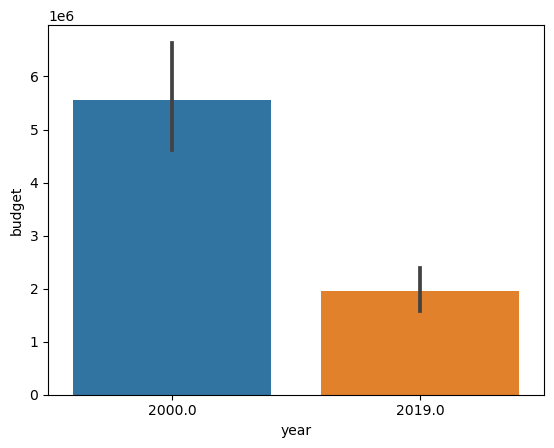

In [35]:
sns.barplot(data=plot_df, x='year',y='budget')

The graph is proof that since the variance is different, there is a difference in budget on both years, hence null hypothesis is rejected.